Our Dataset contain data of of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. We have to make Predictions for 
1. Primary Fuel    
2. capacity_mw 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Impoerting necessary libraries to proceeed further. 

In [2]:
power2 = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
power2.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

We have imported the dataset and stored the dataset in a variable named Power. We need to predict the primary_fuel here. We can see that there are several categories in this columns, hence we have to proceed to build a classification probelm. 

In [3]:
power = power2.copy()

In [4]:
power.shape

(908, 25)

We can check that our dataset is having 908 rows and 25 Columns

In [5]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

Above is the detailed information about the dataset. We can see that we have 25 columns, next to which non null values are presented. After that datatype of the projects are represented. 

In [6]:
power.describe(include='all')

country country_long                      name   gppd_idnr  \
count      908          908                       908         908   
unique       1            1                       908         908   
top        IND        India  Mulshi Solar Power Plant  WRI1019984   
freq       908          908                         1           1   
mean       NaN          NaN                       NaN         NaN   
std        NaN          NaN                       NaN         NaN   
min        NaN          NaN                       NaN         NaN   
25%        NaN          NaN                       NaN         NaN   
50%        NaN          NaN                       NaN         NaN   
75%        NaN          NaN                       NaN         NaN   
max        NaN          NaN                       NaN         NaN   

        capacity_mw    latitude   longitude primary_fuel other_fuel1  \
count    908.000000  862.000000  862.000000          908         199   
unique          NaN         NaN         NaN            8           3   
top             NaN         NaN         NaN         Coal         Oil   
freq            NaN         NaN         NaN          259         196   
mean     321.046378   21.196189   77.447848          NaN         NaN   
std      580.221767    6.248627    4.907260          NaN         NaN   
min        0.000000    8.168900   68.644700          NaN         NaN   
25%       16.837500   16.771575   74.258975          NaN         NaN   
50%       60.000000   21.778300   76.719250          NaN         NaN   
75%      388.125000   25.516375   79.441475          NaN         NaN   
max     4760.000000   34.649000   95.408000          NaN         NaN   

       other_fuel2  ...  geolocation_source  wepp_id year_of_capacity_data  \
count            1  ...                 889      0.0                 520.0   
unique           1  ...                   3      NaN                   NaN   
top            Oil  ...                 WRI      NaN                   NaN   
freq             1  ...                 766      NaN                   NaN   
mean           NaN  ...                 NaN      NaN                2018.0   
std            NaN  ...                 NaN      NaN                   0.0   
min            NaN  ...                 NaN      NaN                2018.0   
25%            NaN  ...                 NaN      NaN                2018.0   
50%            NaN  ...                 NaN      NaN                2018.0   
75%            NaN  ...                 NaN      NaN                2018.0   
max            NaN  ...                 NaN      NaN                2018.0   

       generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
count           384.000000          401.000000          425.000000   
unique                 NaN                 NaN                 NaN   
top                    NaN                 NaN                 NaN   
freq                   NaN                 NaN                 NaN   
mean           2304.059202         2420.393316         2414.072373   
std            3794.767492         4013.558173         4183.203199   
min               0.000000            0.000000            0.000000   
25%             244.458088          223.650436          174.174750   
50%             797.063475          805.760000          701.027250   
75%            2795.021500         3034.575000         3080.000000   
max           27586.200000        28127.000000        30539.000000   

        generation_gwh_2016  generation_gwh_2017  \
count            437.000000           443.000000   
unique                  NaN                  NaN   
top                     NaN                  NaN   
freq                    NaN                  NaN   
mean            2453.936292          2531.754458   
std             4152.038216          4187.236364   
min                0.000000             0.000000   
25%              187.193669           177.643170   
50%              716.728350           807.601700   
75%            

The above command shoes the mathematical representation of each column. Like we can see that other_fuel3 and wepp_id don't have any count means no values. Hence all the parameters having null values in the columns

In [7]:
power.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

The above command shoes the null values in the project. 
We can see that columns with 0 values don't have any null values in them. COlumns with some numerical values having that much null values in that columns.

Eg:-
1. Latitude and longitude is having 46 null values
2. Other fuel_3, wepp_id and estimated_generation_gwh is having 908 null values, and so on. 

In [8]:
power = power.drop("other_fuel2",axis = 1)
power = power.drop("other_fuel3",axis = 1)
power = power.drop("wepp_id",axis = 1)
power = power.drop("estimated_generation_gwh",axis = 1)
power = power.drop("name",axis = 1)

In [9]:
power.head()

country country_long   gppd_idnr  capacity_mw  latitude  longitude  \
0     IND        India  WRI1020239          2.5   28.1839    73.2407   
1     IND        India  WRI1019881         98.0   24.7663    74.6090   
2     IND        India  WRI1026669         39.2   21.9038    69.3732   
3     IND        India  IND0000001        135.0   23.8712    91.3602   
4     IND        India  IND0000002       1800.0   21.9603    82.4091   

  primary_fuel other_fuel1  commissioning_year                 owner  \
0        Solar         NaN              2011.0           Solar Paces   
1         Coal         NaN                 NaN  Ultratech Cement ltd   
2         Wind         NaN                 NaN                   AES   
3          Gas         NaN              2004.0                   NaN   
4         Coal         Oil              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2018.0   
4                                   WRI                 2018.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           631.777928           617.789264              843.747   
4          1668.290000          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           886.004428           663.774500  Central Electricity Authority  
4          6243.000000          5385.579736  Central Electricity Authority

In [10]:
power.dtypes

country                    object
country_long               object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

The above code represents the datatypes of the dataset. Out of 25 rows we have 12 objects dataypes columns and 13 float64 columns. 

In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

As our dataset is having object datatype we have imported label encoder from sklearn and we will convert the object to int or float dataype using encoder. 

In [12]:
col=power.columns
col

Index(['country', 'country_long', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

List of all the columns in our dataset. 

In [13]:
for i in col:
    if power[i].dtypes == 'object':
        power[i] = label.fit_transform(power[i])

We have converted all the columns with object dtype to numerical 

In [14]:
power.dtypes

country                     int32
country_long                int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int32
dtype: object

We can check the same using the dtype function

In [15]:
print("Total values with their number in the column are:- \n",power["primary_fuel"].value_counts())

Total values with their number in the column are:- 
 1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64


We can check that Primary fuel is having 8 values. The number shoes how many times the values are repeated in that column. 

In [16]:
print("Total unique values in Primary Fuel:- \n",power2["primary_fuel"].unique())
print("The values changed to after encoding:- \n", power["primary_fuel"].unique())

Total unique values in Primary Fuel:- 
 ['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
The values changed to after encoding:- 
 [6 1 7 2 3 0 5 4]


The above shows the unique values in the target column.

([<matplotlib.patches.Wedge at 0x26856f30b80>,
 [Text(0.6871132748652865, 0.8589967098329897, 'Solar'),
  Text(-0.9734568571138555, 0.51223212251675, 'Coal'),
  Text(-0.7504455940494764, -0.8042582982921149, 'Wind'),
  Text(0.12532177611146003, -1.0928377978603547, 'Gas'),
  Text(0.772416510066145, -0.7831811635740719, 'Hydro'),
  Text(1.0212904212570872, -0.40861458056281014, 'Biomass'),
  Text(1.0900008965573815, -0.14797988209248045, 'Oil'),
  Text(1.0994667370089837, -0.03424754313551183, 'Nuclear')])

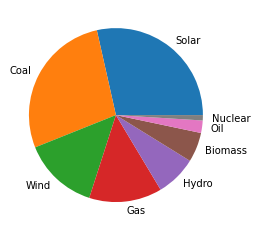

In [17]:
plt.pie(power["primary_fuel"].value_counts(),labels=['Solar','Coal','Wind' ,'Gas', 'Hydro', 'Biomass', 'Oil' ,'Nuclear'])

The above pie chart represents, how the data is distributed over the column. We can see that all values are differently distributed, so we can say that we are having a class imbalance problem in the dataset. 

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

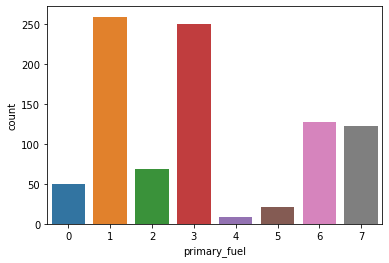

In [18]:
sns.countplot(power["primary_fuel"])

Same representation using a count plot. 

In [19]:
col

Index(['country', 'country_long', 'gppd_idnr', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'other_fuel1', 'commissioning_year',
       'owner', 'source', 'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='country', ylabel='count'>

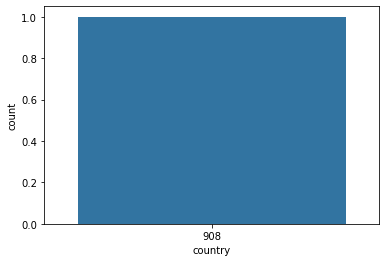

In [20]:
sns.countplot(power["country"].value_counts())

So, this column only contains 1 value. 

In [21]:
power.head(5)

country  country_long  gppd_idnr  capacity_mw  latitude  longitude  \
0        0             0        658          2.5   28.1839    73.2407   
1        0             0        520         98.0   24.7663    74.6090   
2        0             0        854         39.2   21.9038    69.3732   
3        0             0          0        135.0   23.8712    91.3602   
4        0             0          1       1800.0   21.9603    82.4091   

   primary_fuel  other_fuel1  commissioning_year  owner  source  url  \
0             6            3              2011.0    229     109  128   
1             1            3                 NaN    258     174  173   
2             7            3                 NaN      2      21  205   
3             2            3              2004.0    280      22   58   
4             1            2              2015.0    280      22   58   

   geolocation_source  year_of_capacity_data  generation_gwh_2013  \
0                   1                    NaN                  NaN   
1                   2                    NaN                  NaN   
2                   2                    NaN                  NaN   
3                   2                 2018.0           631.777928   
4                   2                 2018.0          1668.290000   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_data_source  
0                  NaN                       1  
1                  NaN                       1  
2                  NaN                       1  
3           663.774500                       0  
4          5385.579736                       0

We can check that country and country_long is having same values so we can drop these columns. 

In [22]:
power = power.drop("country",axis = 1)
power = power.drop("country_long",axis = 1)

We dropped both the columns from the dataset. 

In [23]:
power.head(5)

gppd_idnr  capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0        658          2.5   28.1839    73.2407             6            3   
1        520         98.0   24.7663    74.6090             1            3   
2        854         39.2   21.9038    69.3732             7            3   
3          0        135.0   23.8712    91.3602             2            3   
4          1       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1                 NaN    258     174  173                   2   
2                 NaN      2      21  205                   2   
3              2004.0    280      22   58                   2   
4              2015.0    280      22   58                   2   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_data_source  
0                       1  
1                       1  
2                       1  
3                       0  
4                       0

In [24]:
col = power.columns

<AxesSubplot:xlabel='gppd_idnr', ylabel='count'>

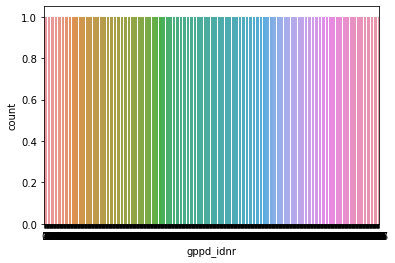

In [25]:
sns.countplot(power["gppd_idnr"])

This graph shows the value of gppd_idnr with count repetition in the columns. 

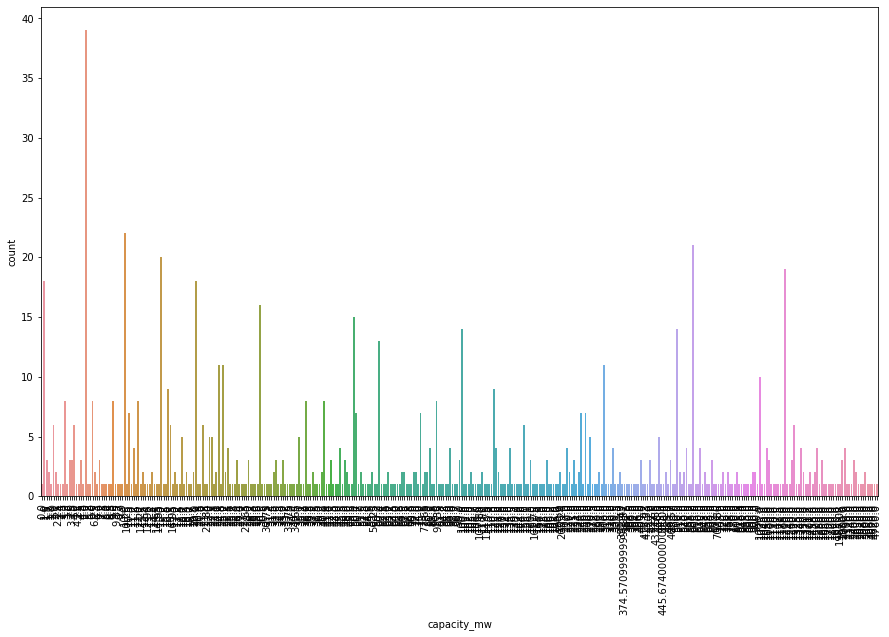

In [26]:
plt.figure(figsize=(15,9))
plt.xticks(rotation = 90)
sns.countplot(power["capacity_mw"])
plt.show()

From the above data we can check that count of values, how many times a particular value is coming in the column. 

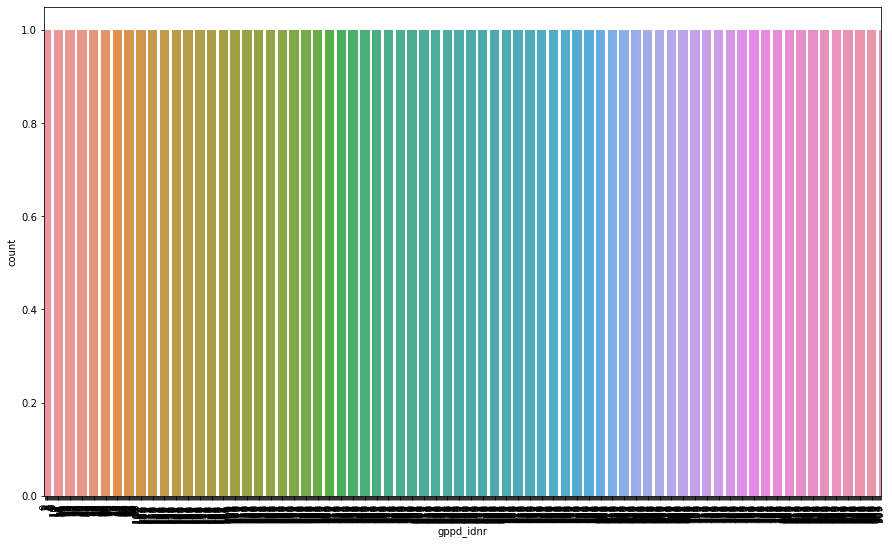

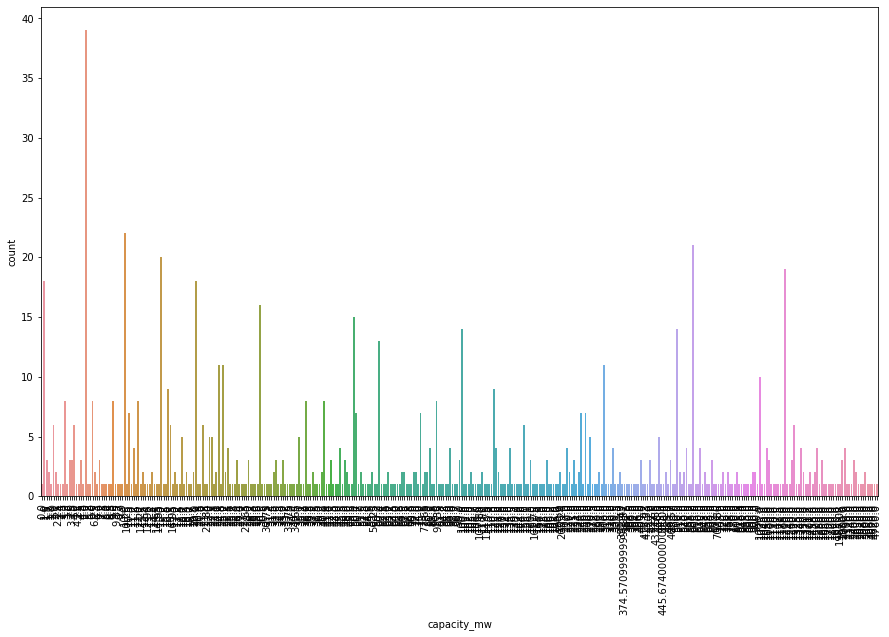

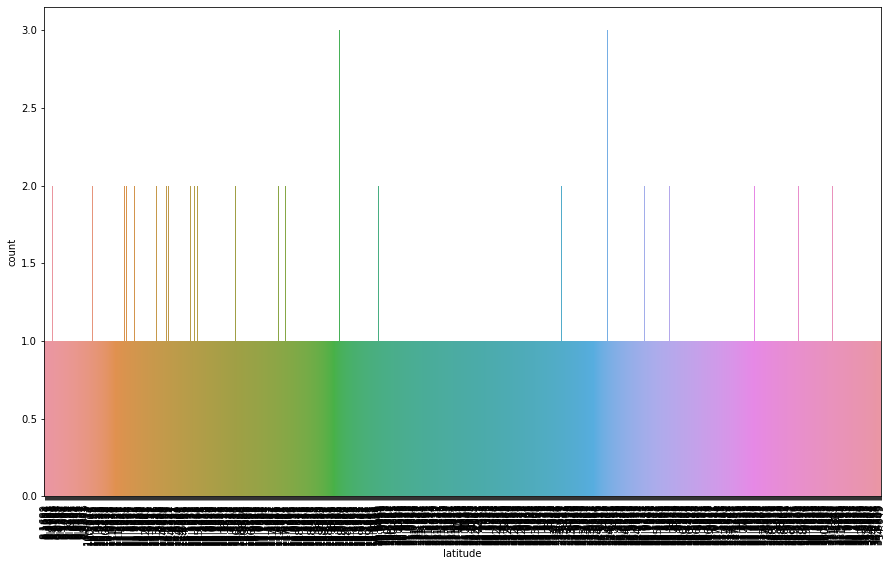

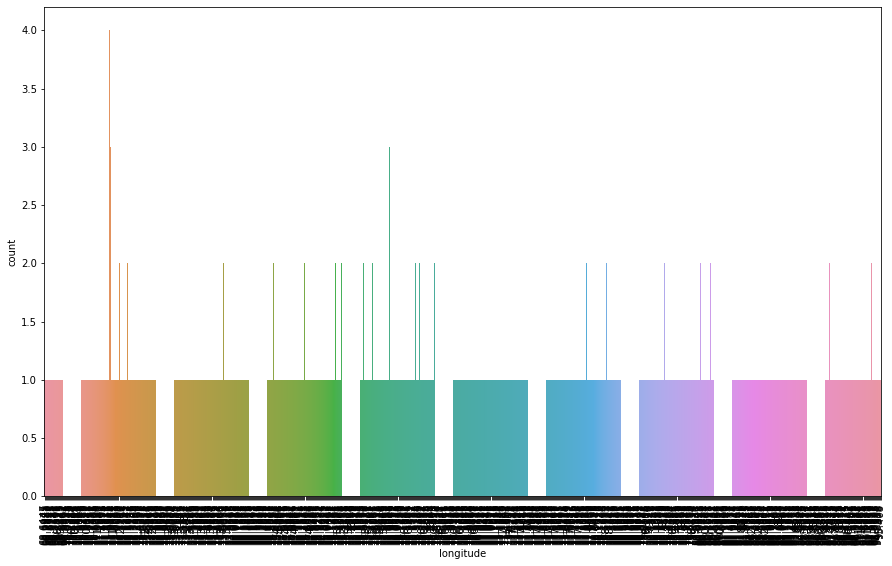

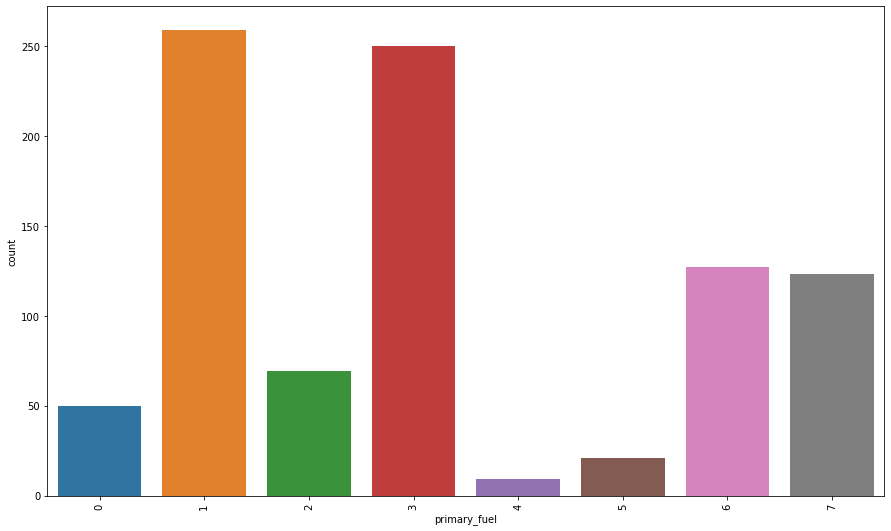

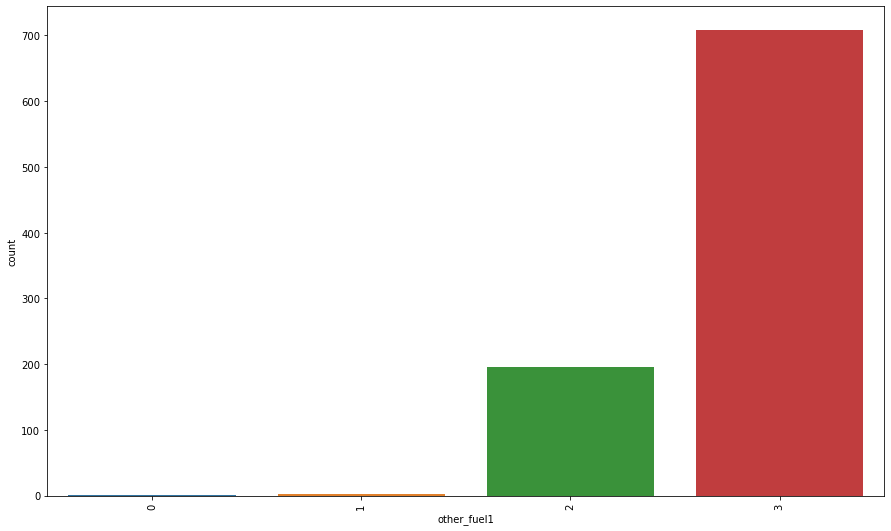

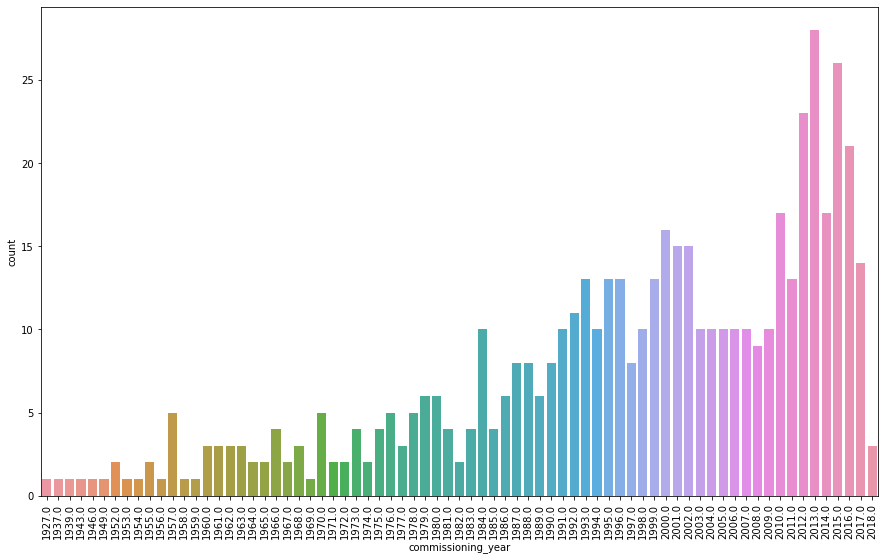

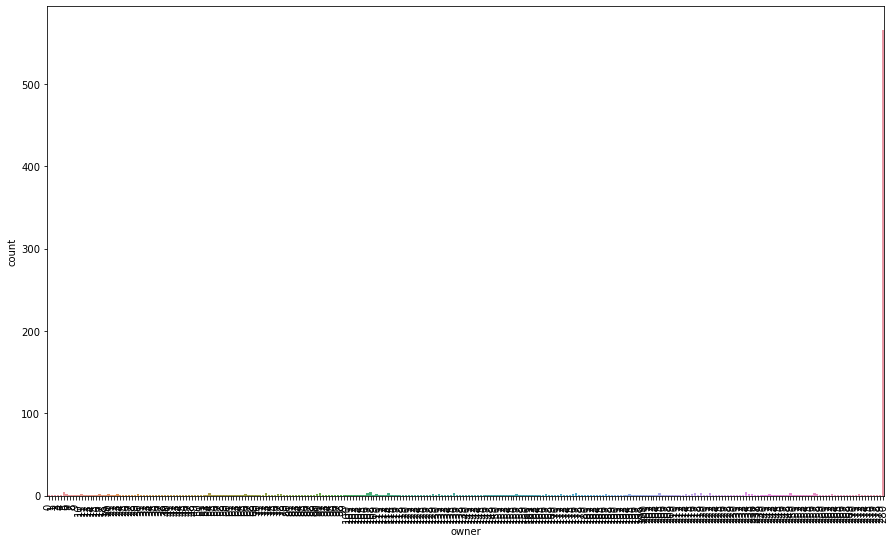

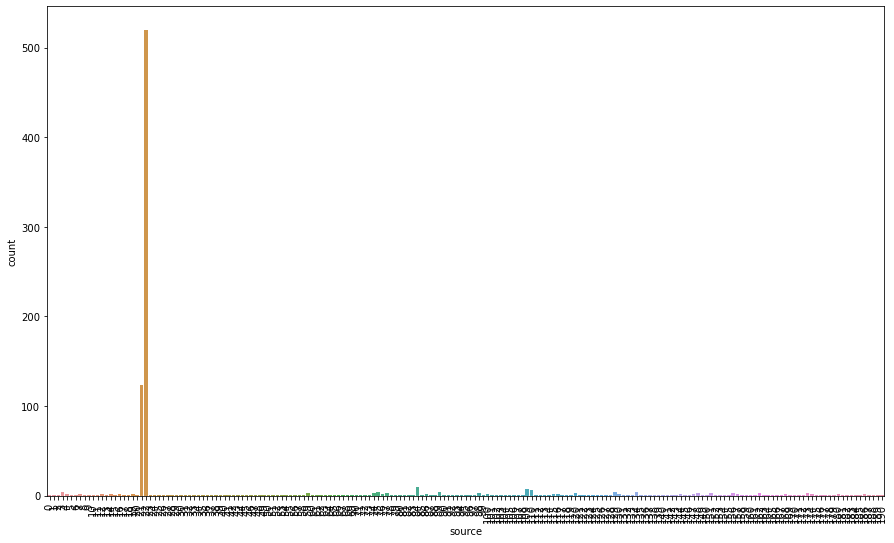

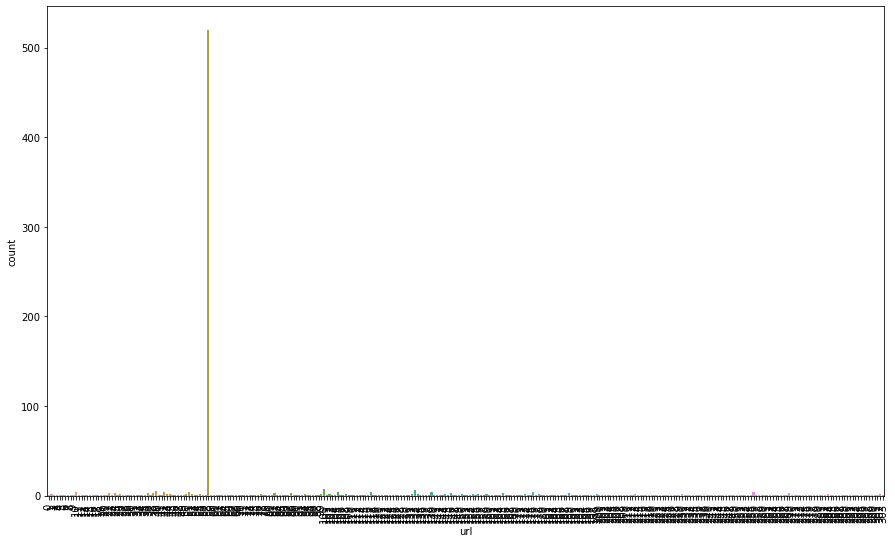

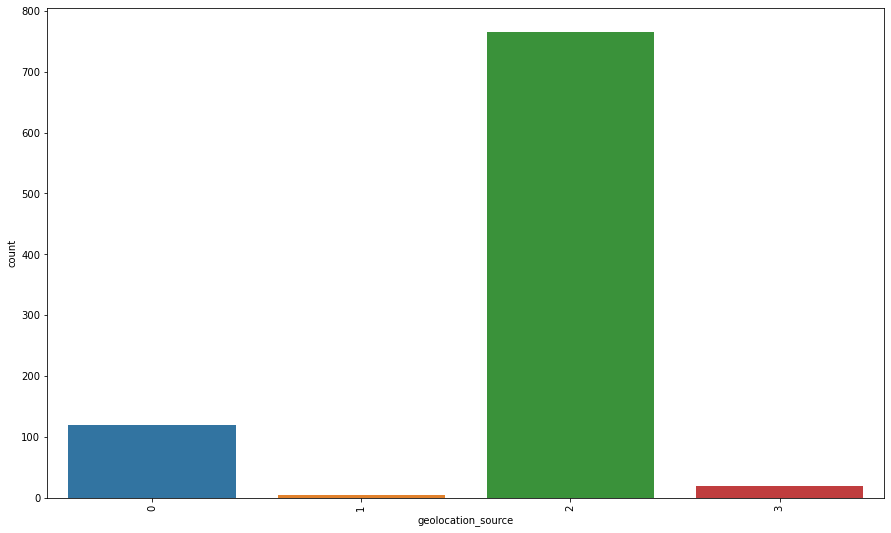

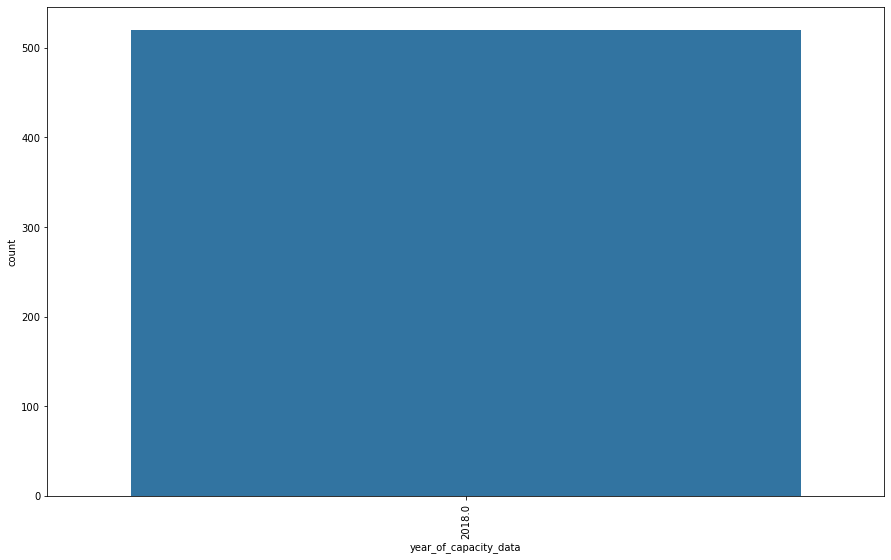

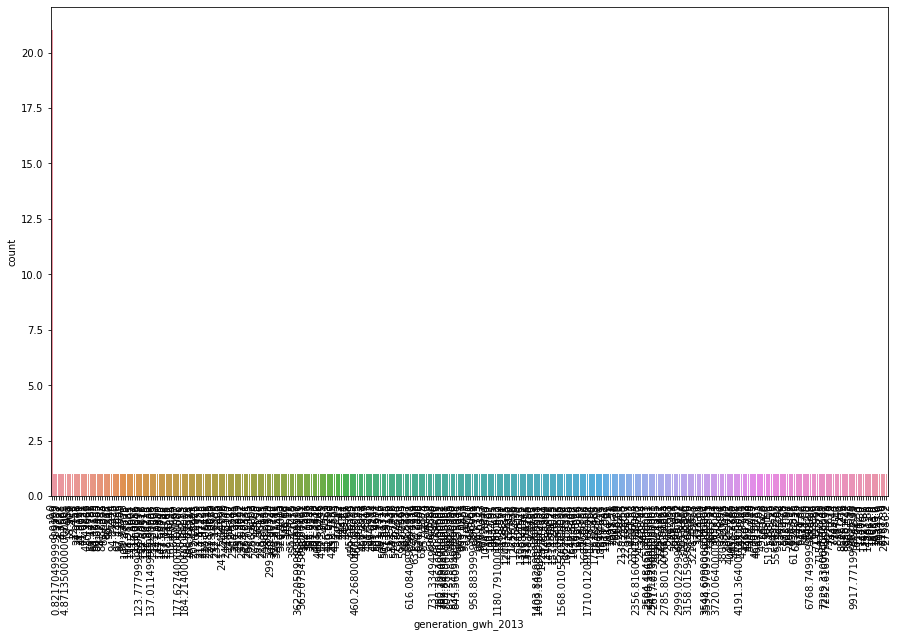

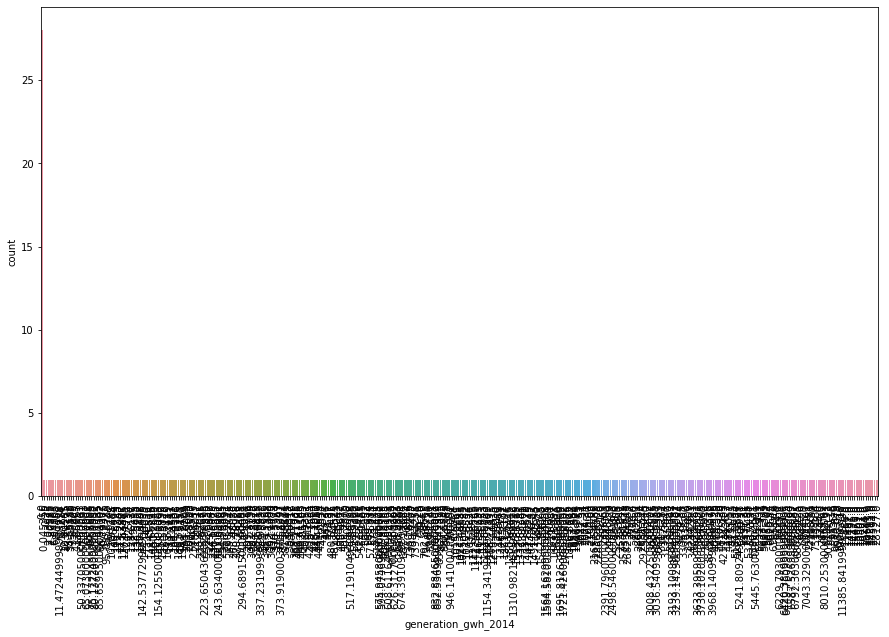

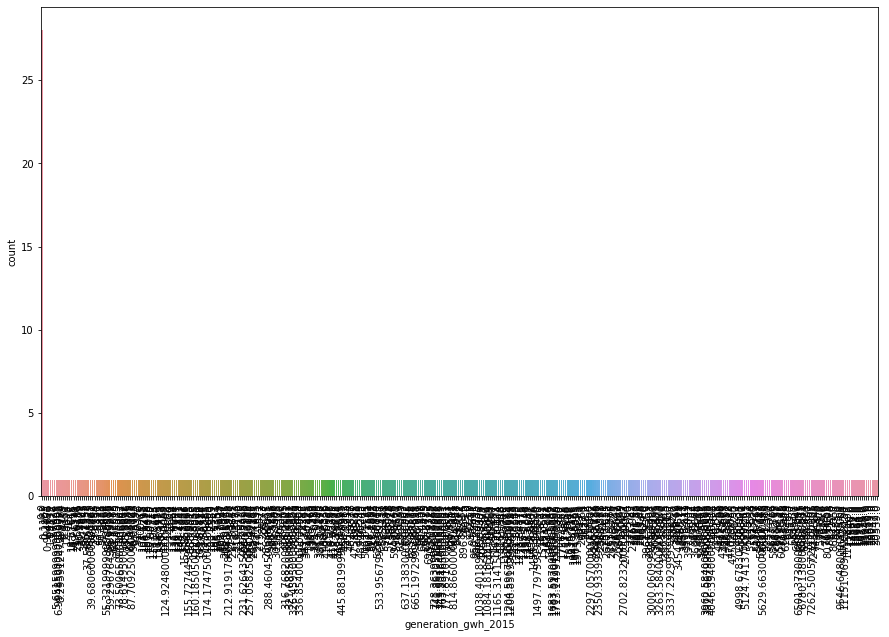

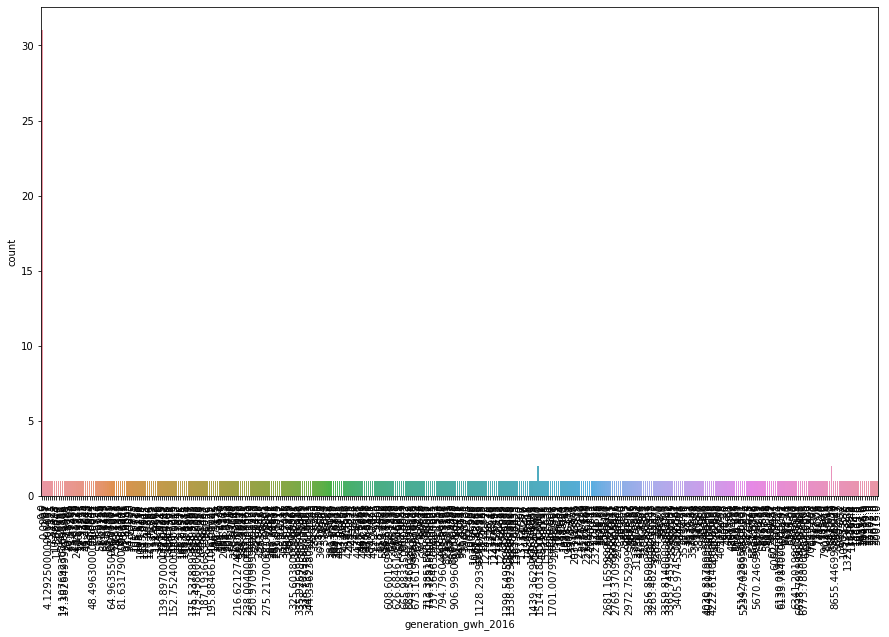

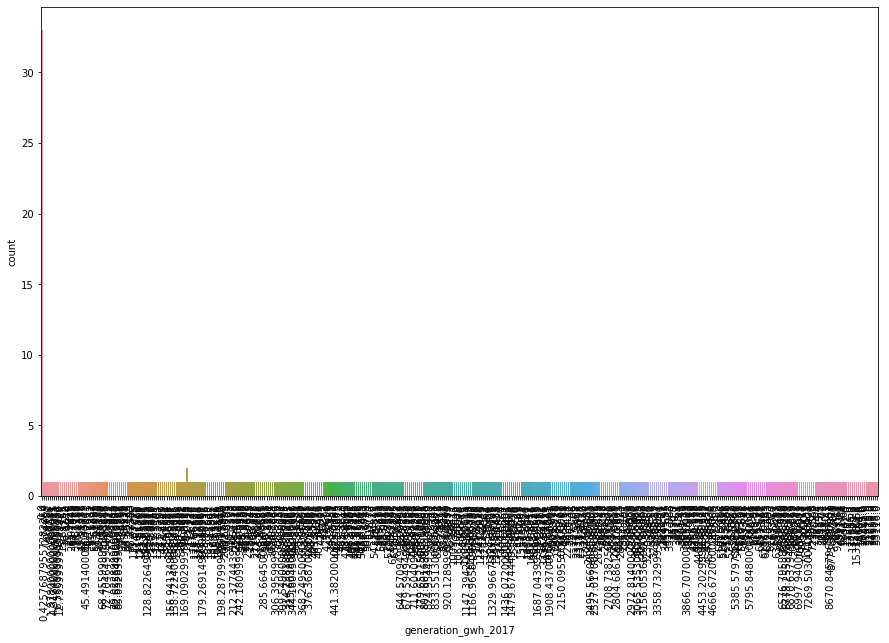

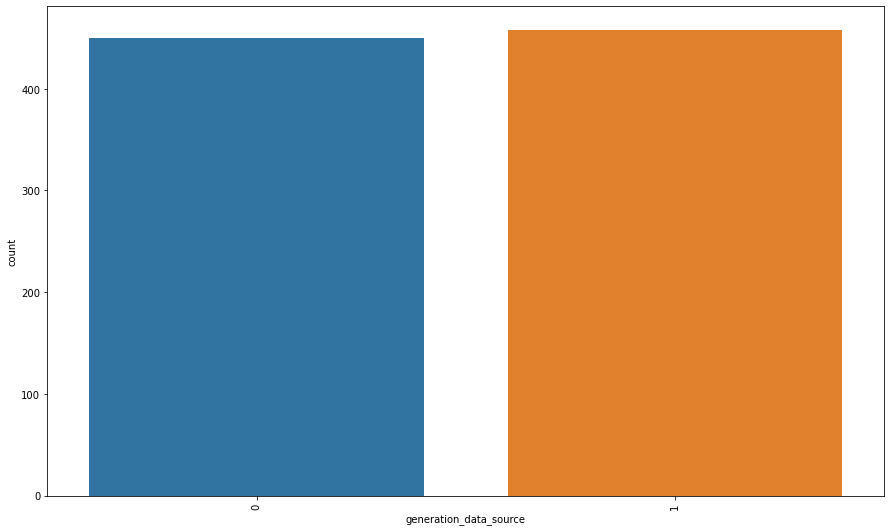

In [27]:
for i in col:
    plt.figure(figsize=(15,9))
    plt.xticks(rotation = 90)
    sns.countplot(power[i])
    plt.show()

The above graph shows the names of the power plant and type of powerplant 

In [28]:
col

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

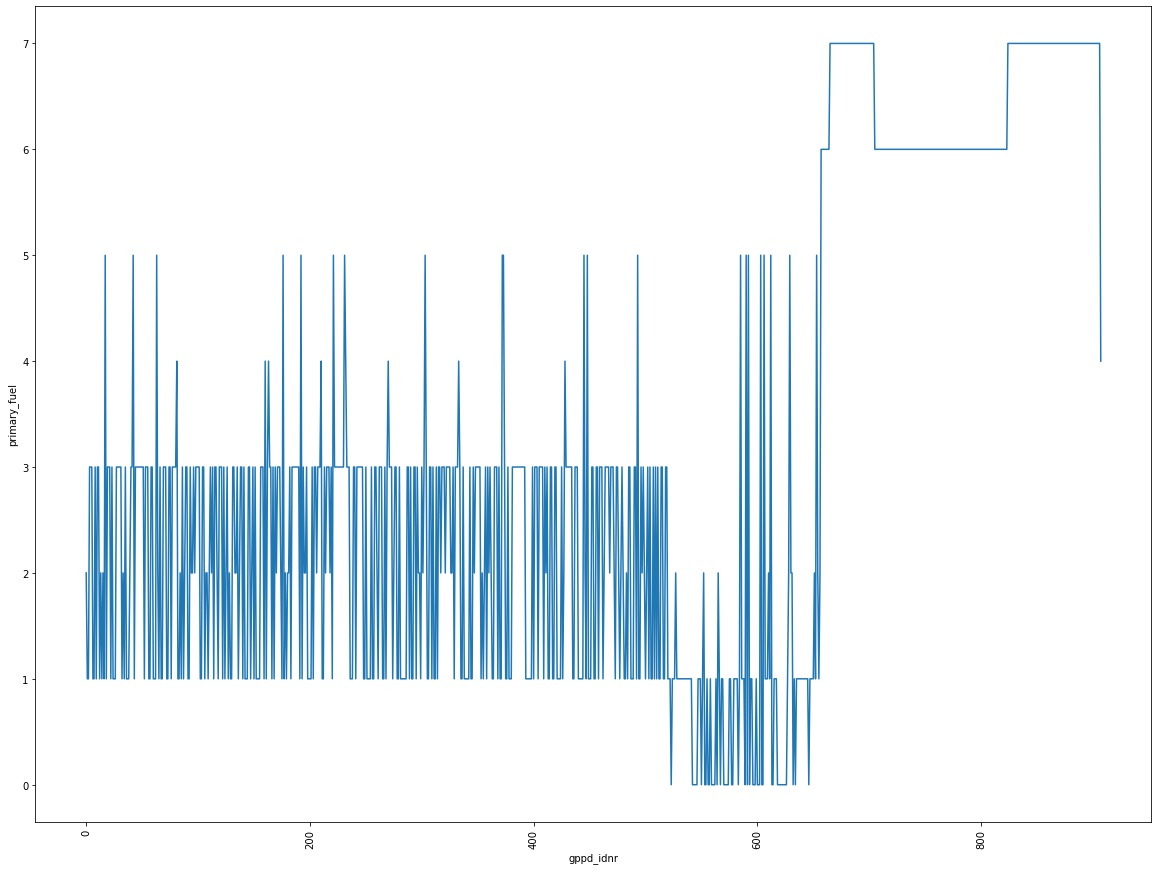

In [29]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.lineplot(x='gppd_idnr' , y='primary_fuel' , data=power)
plt.show()

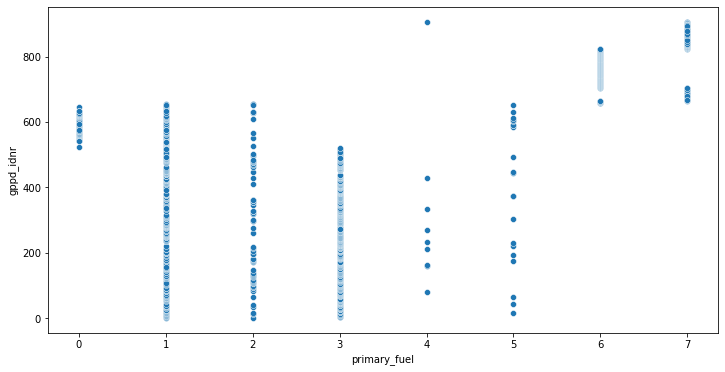

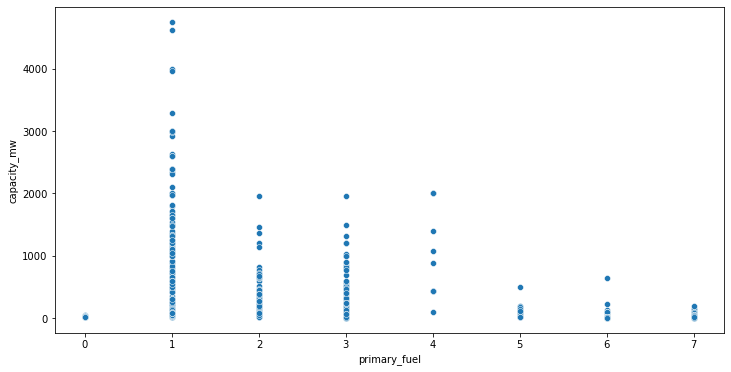

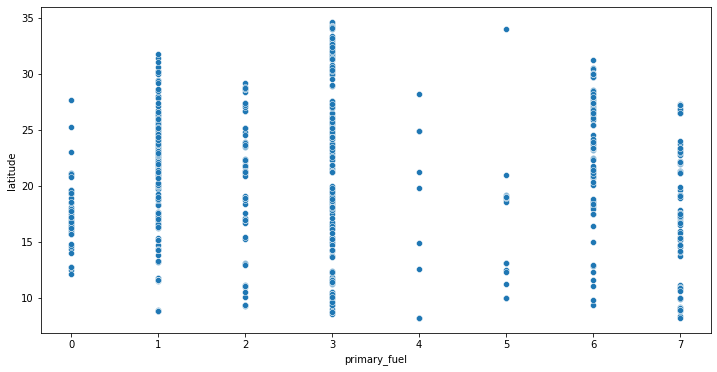

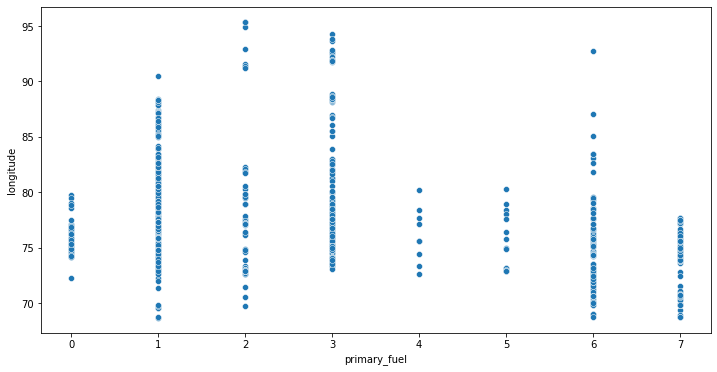

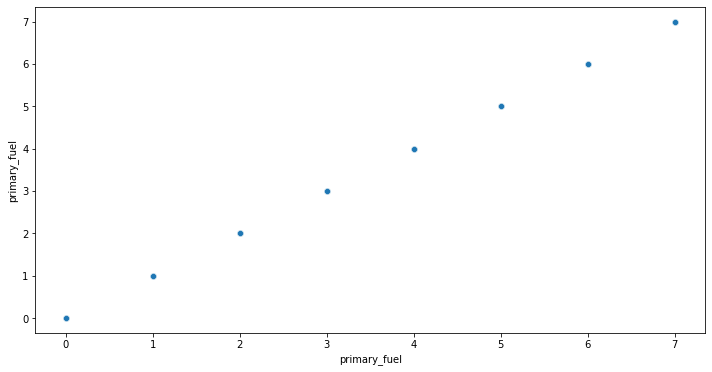

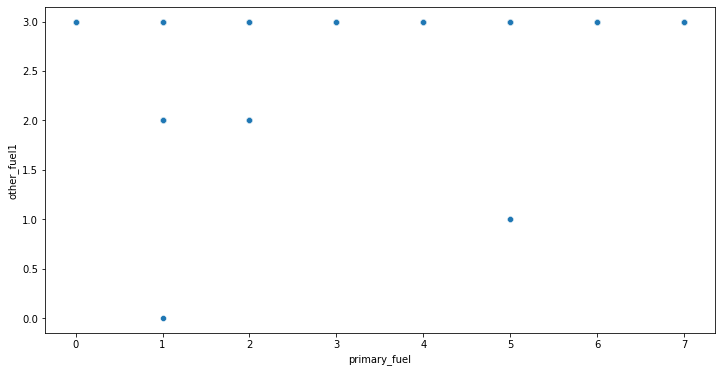

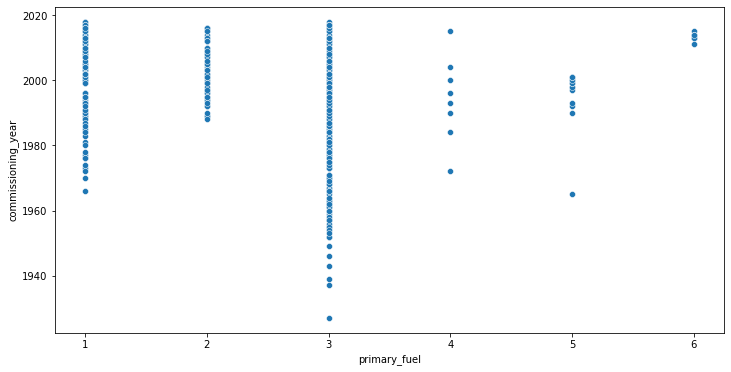

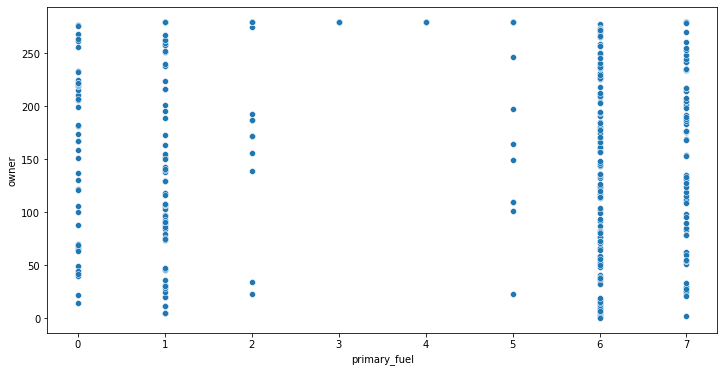

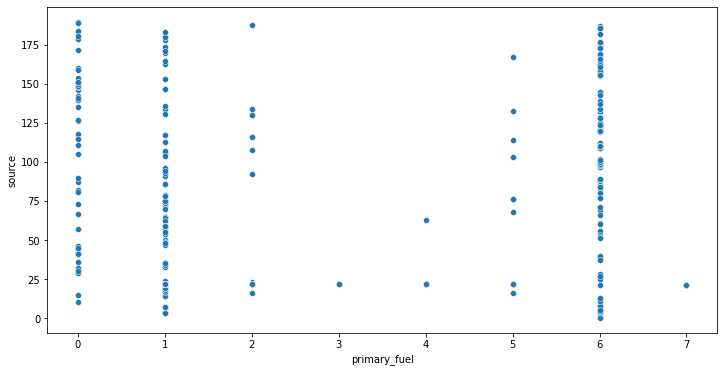

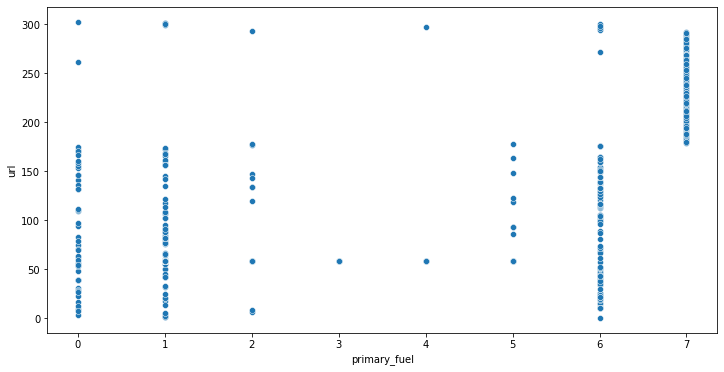

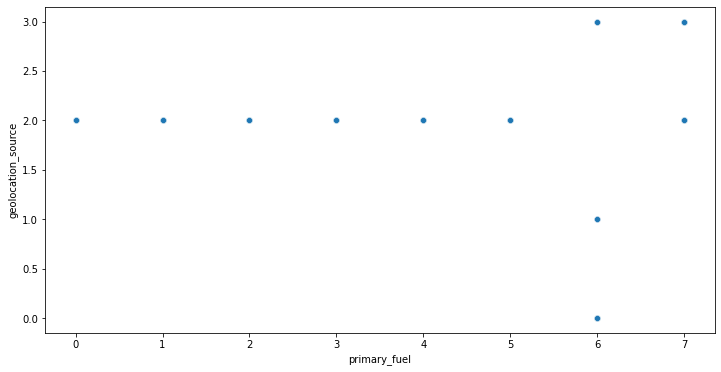

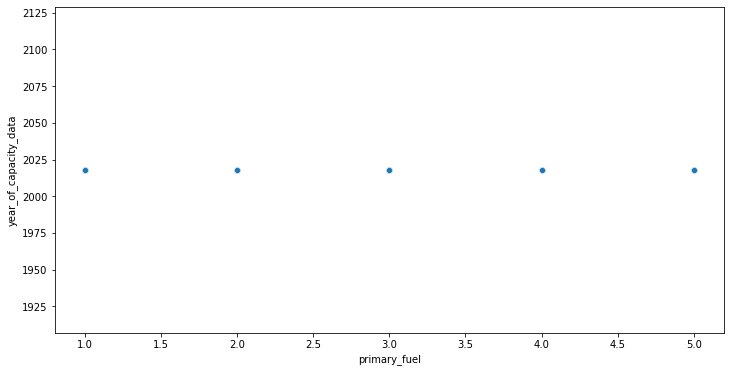

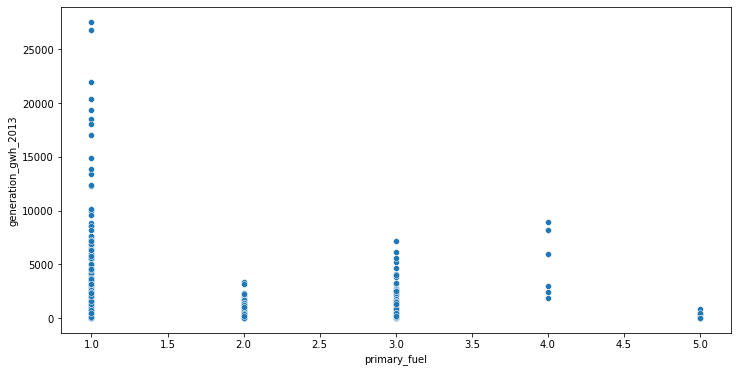

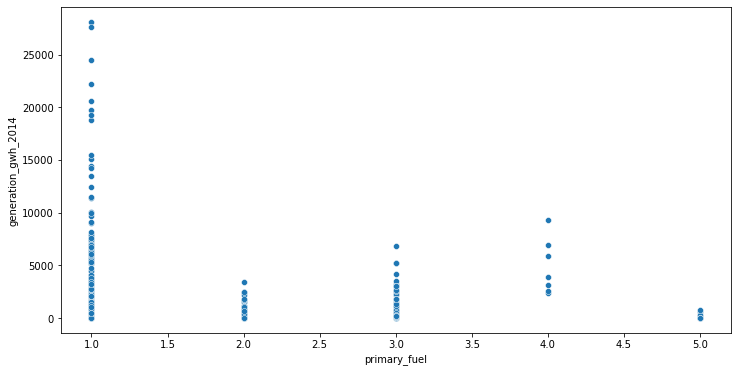

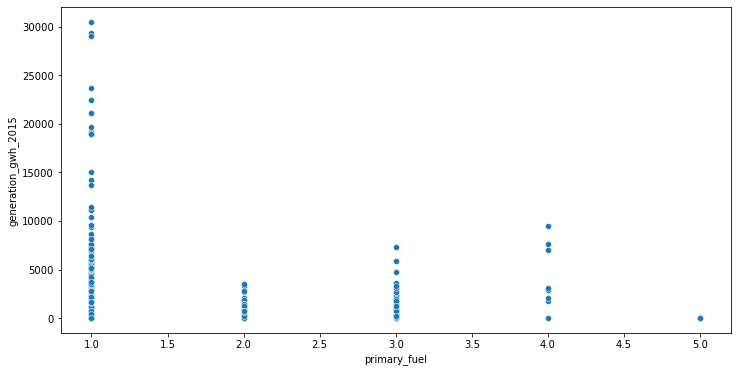

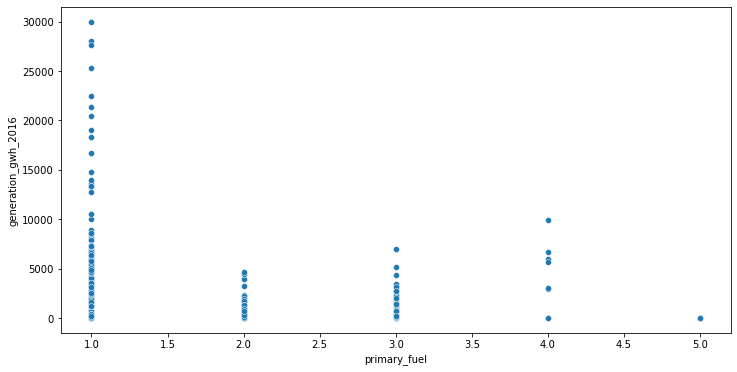

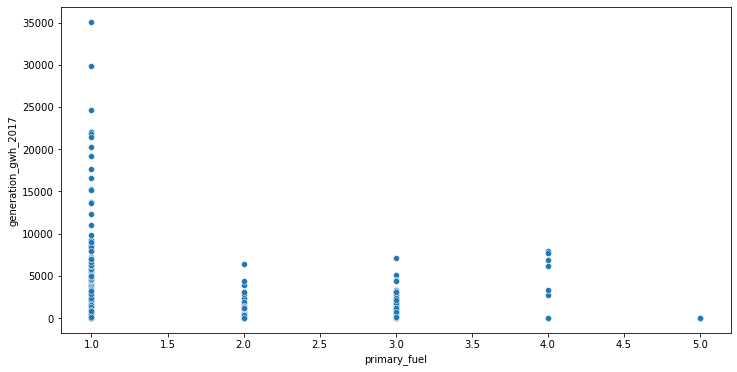

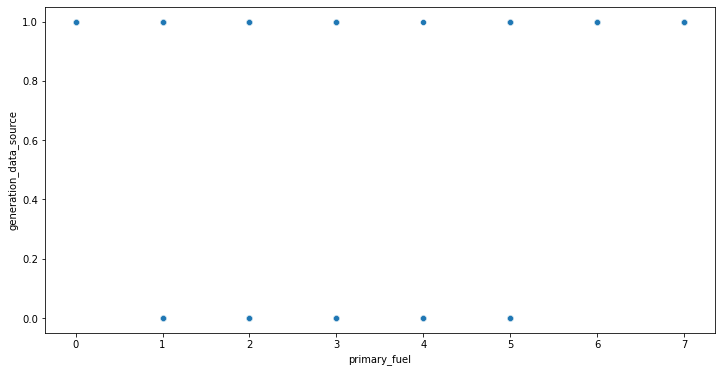

In [30]:
for i in col:
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = 'primary_fuel' , y = i , data = power)
    plt.show()

<Figure size 864x432 with 0 Axes>

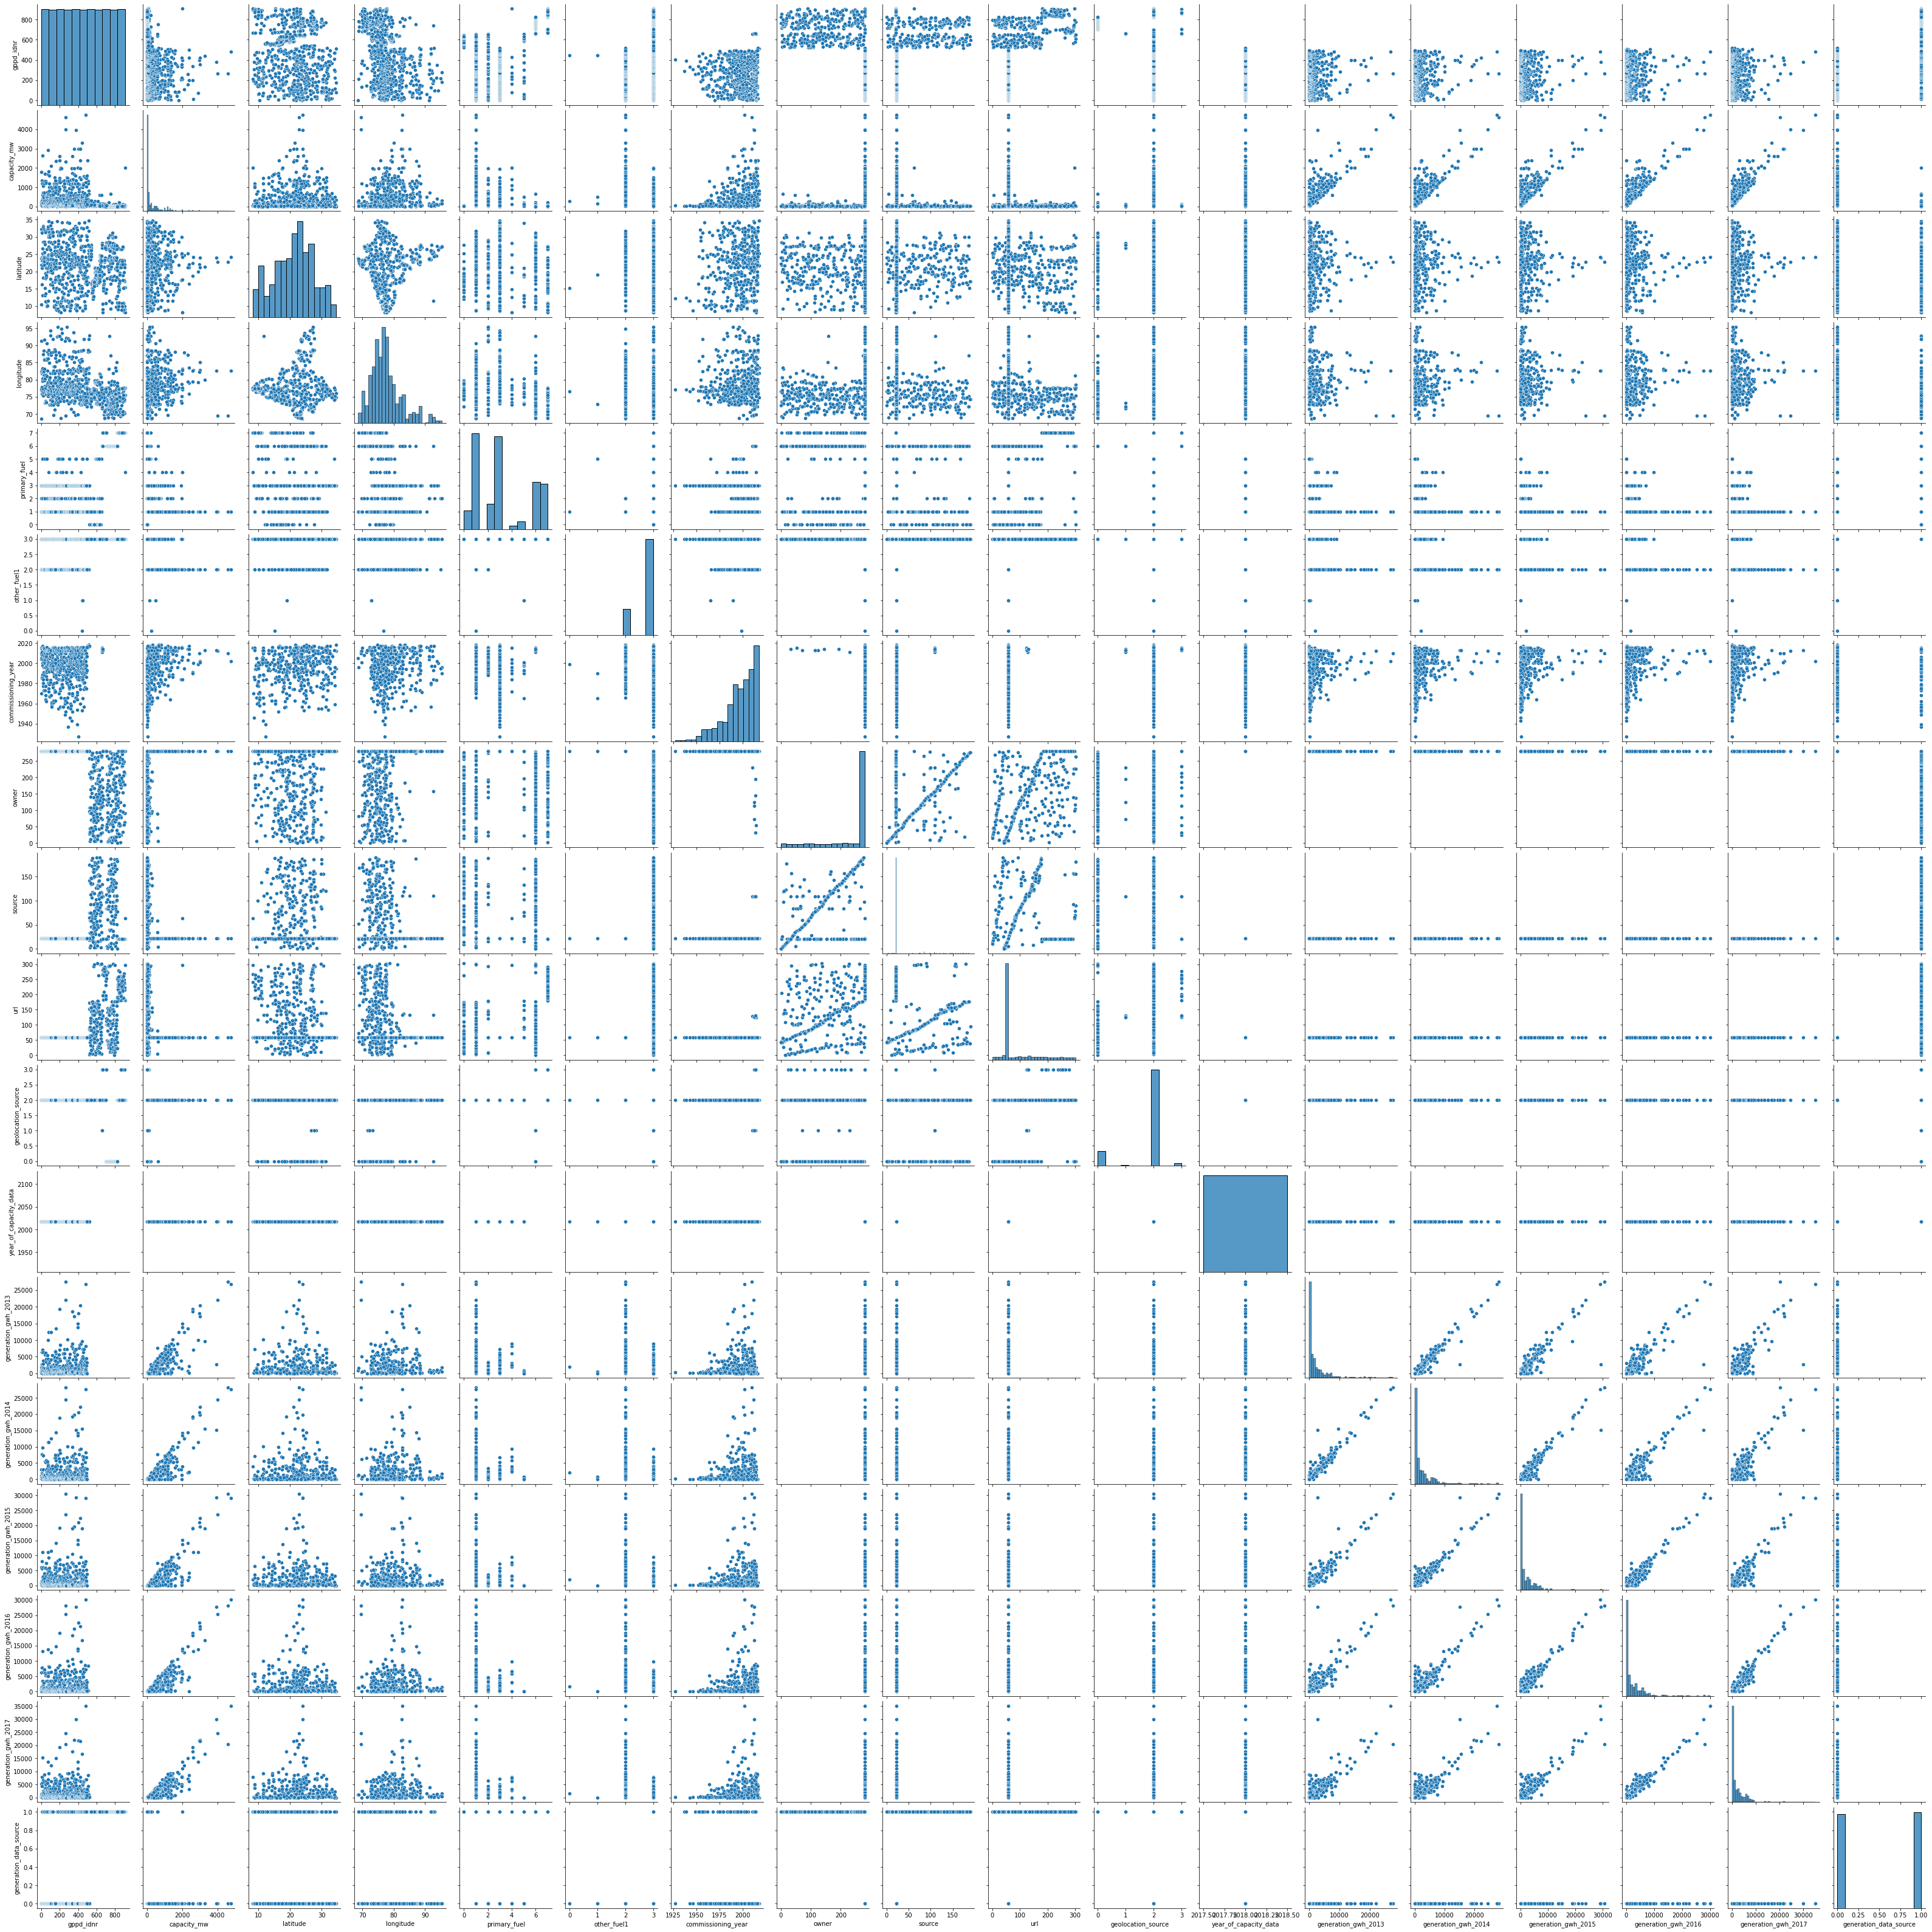

In [31]:
plt.figure(figsize = (12,6))
sns.pairplot(power)
plt.show()

The above is the pairplot for the power dataset. Pairplot represent the relation of columns amongst each other. 

In [32]:
null_values = pd.DataFrame({})
null_values["Null Values"] = power.isnull().sum() 
null_values["Datatype"] = power.dtypes
null_values

Null Values Datatype
gppd_idnr                         0    int32
capacity_mw                       0  float64
latitude                         46  float64
longitude                        46  float64
primary_fuel                      0    int32
other_fuel1                       0    int32
commissioning_year              380  float64
owner                             0    int32
source                            0    int32
url                               0    int32
geolocation_source                0    int32
year_of_capacity_data           388  float64
generation_gwh_2013             524  float64
generation_gwh_2014             507  float64
generation_gwh_2015             483  float64
generation_gwh_2016             471  float64
generation_gwh_2017             465  float64
generation_data_source            0    int32

Above we created a small dataframe to represent the null values and datatype of the power dataset. 

In [33]:
for i in col:
    if power[i].dtypes == "float64":
        print("Columns",i," have datatype FLOAT64")
        if power[i].skew() > 0.55 or power[i].skew() < -0.55:
            print("Column",i,"is skewed. The column have skewness =",power[i].skew())
            print("Replacing null values using median")
            power[i] = power[i].fillna(power[i].median())
            print("\n")
        else:
            print("Removing Null values using mean from non skewed column")
            power[i] = power[i].fillna(power[i].mean())
            print("\n")

Columns capacity_mw  have datatype FLOAT64
Column capacity_mw is skewed. The column have skewness = 3.1932573023446458
Replacing null values using median


Columns latitude  have datatype FLOAT64
Removing Null values using mean from non skewed column


Columns longitude  have datatype FLOAT64
Column longitude is skewed. The column have skewness = 1.1009421966310267
Replacing null values using median


Columns commissioning_year  have datatype FLOAT64
Column commissioning_year is skewed. The column have skewness = -1.0561318555309964
Replacing null values using median


Columns year_of_capacity_data  have datatype FLOAT64
Removing Null values using mean from non skewed column


Columns generation_gwh_2013  have datatype FLOAT64
Column generation_gwh_2013 is skewed. The column have skewness = 3.4163376068921907
Replacing null values using median


Columns generation_gwh_2014  have datatype FLOAT64
Column generation_gwh_2014 is skewed. The column have skewness = 3.3576826439934453
Replaci

We have removed the null values from the dataset. We use a for loop and if condition. We replced null values with mean and median. We used median if the data is skewed and mean if the data is normally distributed. 

In [34]:
power.isnull().sum()

gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

We checked the same using isnull.sum 

gppd_idnr                     AxesSubplot(0.125,0.71587;0.0945122x0.16413)
capacity_mw                AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
latitude                   AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
longitude                  AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
primary_fuel               AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
other_fuel1                AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
commissioning_year         AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
owner                        AxesSubplot(0.125,0.518913;0.0945122x0.16413)
source                    AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
url                       AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
geolocation_source        AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
year_of_capacity_data     AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
generation_gwh_2013       AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
generation_gwh_2014      

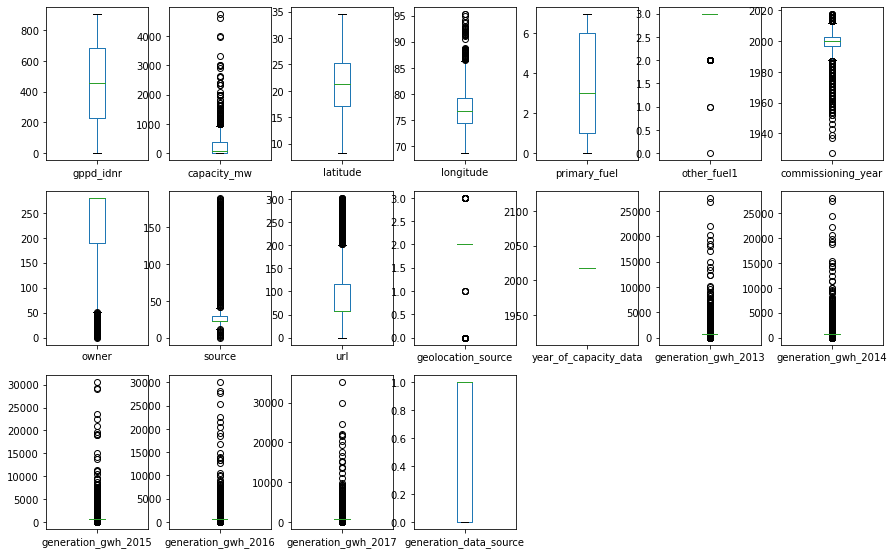

In [35]:
power.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We used boxpolot to check the outliers in the dataset. We can check that we have several columns with outliers in the dataset. 

0.0
gppd_idnr
No skewness is present


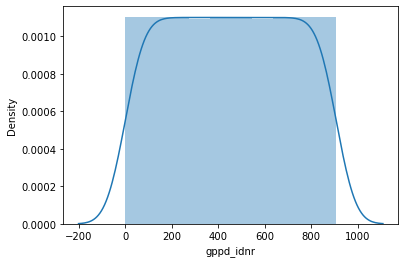

3.1932573023446458
capacity_mw
Column is having skewness


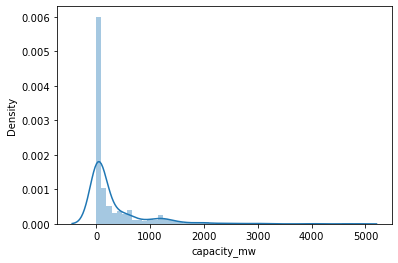

-0.14739148022373944
latitude
No skewness is present


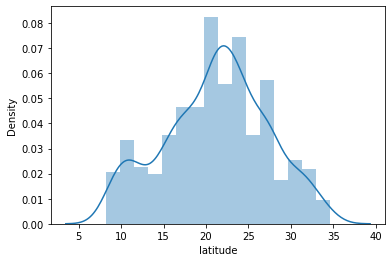

1.150963154131737
longitude
Column is having skewness


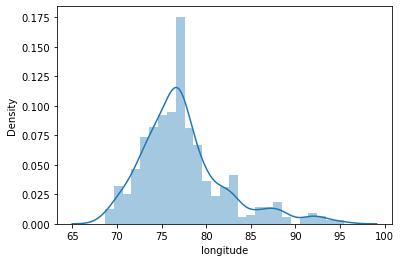

0.47114086346676237
primary_fuel
No skewness is present


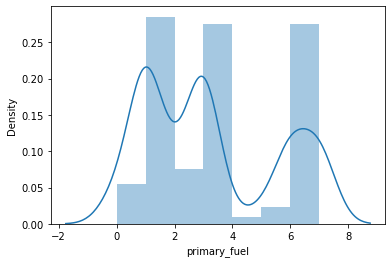

-1.6194409307276927
other_fuel1
Column is having skewness


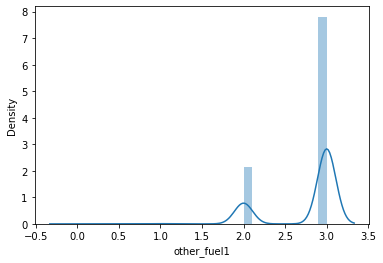

-1.6502303797102624
commissioning_year
Column is having skewness


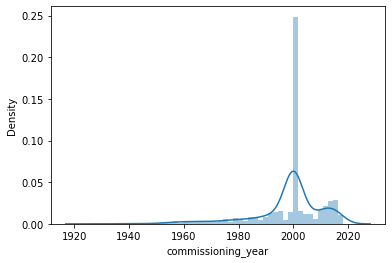

-1.3756067862273889
owner
Column is having skewness


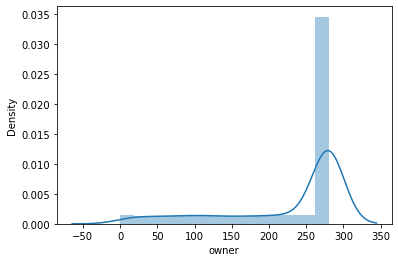

1.829144720333752
source
Column is having skewness


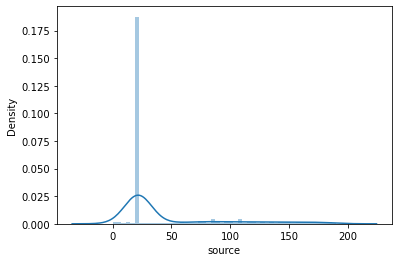

1.5122584535861499
url
Column is having skewness


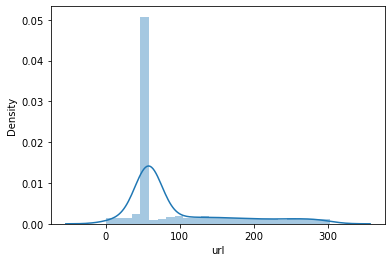

-1.9220799609171169
geolocation_source
Column is having skewness


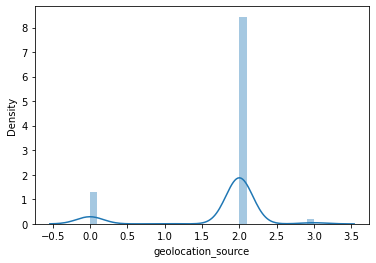

0
year_of_capacity_data
No skewness is present


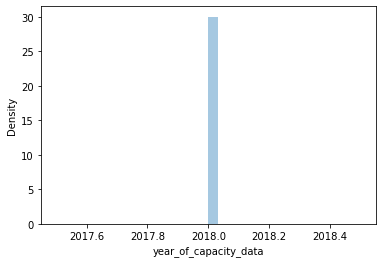

5.535740137046131
generation_gwh_2013
Column is having skewness


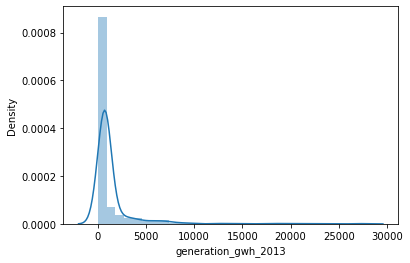

5.325540372189969
generation_gwh_2014
Column is having skewness


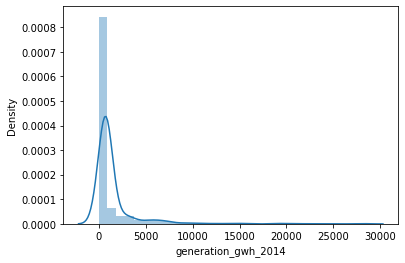

5.565769585345019
generation_gwh_2015
Column is having skewness


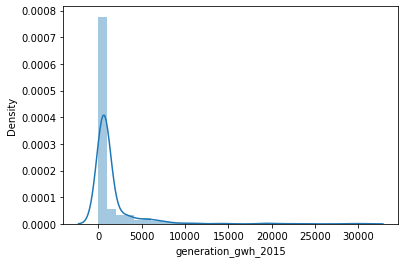

5.278232615549732
generation_gwh_2016
Column is having skewness


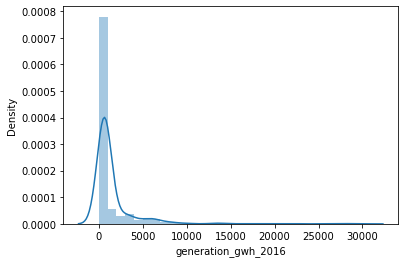

5.312974594183324
generation_gwh_2017
Column is having skewness


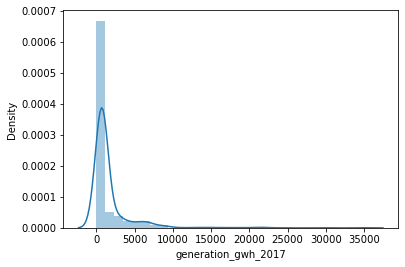

-0.017651001880534225
generation_data_source
No skewness is present


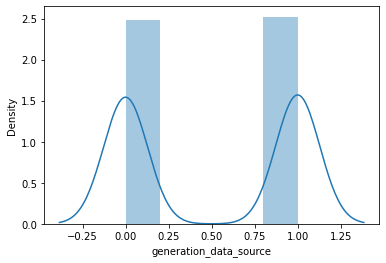

In [36]:
for i in col:
    if (power[i].skew() > 0.55 or power[i].skew() < -0.55): 
        print(power[i].skew())
        print(i)
        print("Column is having skewness")
    else:
        print(power[i].skew())
        print(i)
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(power[i])
    plt.show()

Above we created the distplot for the columns and we can see that data is not normally dotributed as we don't find the normalized bell curve in the graph, Hence we can say that skewness is present in the dataset. 

<function matplotlib.pyplot.show(close=None, block=None)>

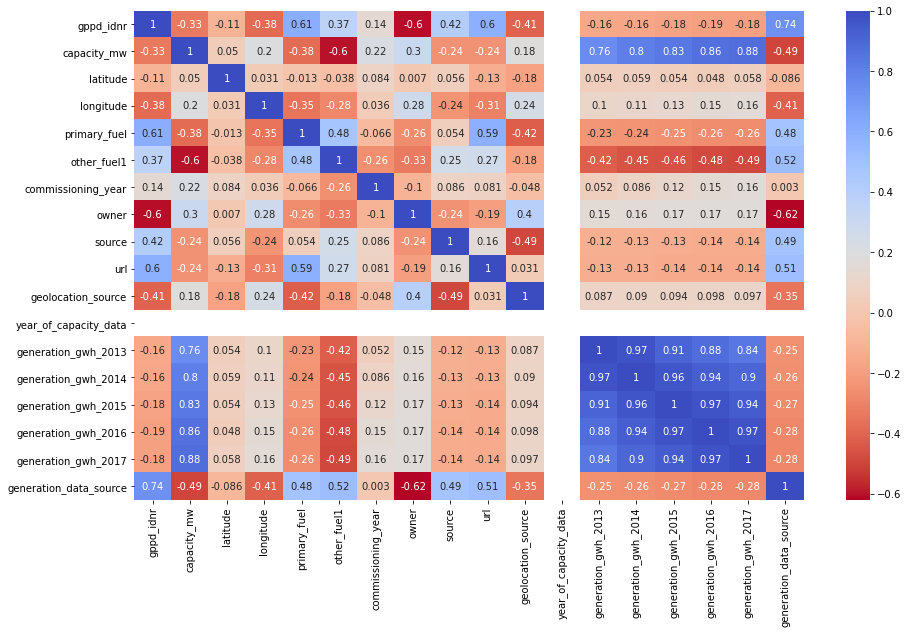

In [37]:
plt.figure(figsize=(15,9))
sns.heatmap(power.corr(),annot=True, cmap = 'coolwarm_r')
plt.show

ABove we created a heatmap for the dataset. Here our label is primary_fuel. We can check that:
1. Primary fuel is having high corelation with generation data source, URL, other fuel 1, gppd_idnr and los corlation with other columns. 
2. Also, we can check that some columns are highly corelated with each other. like generation_gwh_2013,2014,2015,2016,2017 are highly corelated with each other and also with capacity_mw causing multicolinearity in our dataset. 

In [38]:
x = power.drop("primary_fuel",axis = 1)
x.head()

gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0        658          2.5   28.1839    73.2407            3   
1        520         98.0   24.7663    74.6090            3   
2        854         39.2   21.9038    69.3732            3   
3          0        135.0   23.8712    91.3602            3   
4          1       1800.0   21.9603    82.4091            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1              2000.0    258     174  173                   2   
2              2000.0      2      21  205                   2   
3              2004.0    280      22   58                   2   
4              2015.0    280      22   58                   2   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2018.0           797.063475           805.760000   
1                 2018.0           797.063475           805.760000   
2                 2018.0           797.063475           805.760000   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            701.02725           716.728350           807.601700   
1            701.02725           716.728350           807.601700   
2            701.02725           716.728350           807.601700   
3            843.74700           886.004428           663.774500   
4           5916.37000          6243.000000          5385.579736   

   generation_data_source  
0                       1  
1                       1  
2                       1  
3                       0  
4                       0

We have distributed our dataset in x and y. X containg all the independant variable.

In [73]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

We can see that our dataset is having skewness, so removing skewness using above method. 

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

As we have checked earlier our dataset having class imbalancing so we are using standard scaler to balance the dataset before initializing building of our model. 

In [75]:
y = power["primary_fuel"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: primary_fuel, dtype: int32

We have splitted the dataset in X and Y. Y containg the target variable. 

In [76]:
y.unique()

array([1, 0])

In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: primary_fuel, dtype: int32

In [47]:
for i in range(0,908):
    if y[i] == 3 and y[i] < 5:
        y[i] = 0.0
        print("Thermal")
    else:
        y[i] = 1.0
        print("Renewable")

Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Thermal
Thermal
Thermal
Renewable
Renewable
Thermal
Renewable
Thermal
Thermal
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Thermal
Thermal
Thermal
Renewable
Renewable
Thermal
Renewable
Renewable
Renewable
Renewable
Thermal
Thermal
Thermal
Thermal
Thermal
Renewable
Renewable
Renewable
Renewable
Thermal
Renewable
Renewable
Renewable
Renewable
Thermal
Thermal
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Thermal
Renewable
Thermal
Renewable
Renewable
Thermal
Thermal
Thermal
Renewable
Thermal
Thermal
Thermal
Renewable
Renewable
Thermal
Thermal
Thermal
Renewable
Renewable
Renewable
Renewable
Renewable
Renewable
Thermal
Thermal
Renewable
Renewable
Renewable
Renewable
Re

Above we have divied the y in 0 and 1. 
1. 0 = thermal project((e.g. coal, gas, oil, nuclear, biomass, waste, geothermal))
2. 1 = renewable project((e.g. hydro, wind, solar))

In [78]:
from sklearn.model_selection import train_test_split

We called train test split from sklearn which will help us to split our data into training and testing part. 

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 45)

We have noe splitted the dataset into training and testing part. We have set 30% data for testing and remaing for trainig. 

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

We have called all the algorithms reuired to build a machine learning model for classification problem. 

In [81]:
log = LogisticRegression()
nv = GaussianNB()
support = SVC()
knear = KNeighborsClassifier()
dec_tree = DecisionTreeClassifier()

We have assigned a variable for each algorithm

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Here we called accuracy score to check the score of our model. Confusion matrix will show how many values are predicted correctly and how incorrectly. Then we calles classification report which will give us the detailed report of the model including various factor like:-

1. precision
2. recall
3. f1-score
4. support


In [83]:
def predict_model(X):
    X.fit(x_train,y_train)
    prediction = X.predict(x_test)
    print("Details for",X,"Model :-")
    print("The accuracy score for",X,"is:-",accuracy_score(y_test,prediction)*100,'\n')
    cm = confusion_matrix(y_test,prediction)
    print("The confusion matrix for",X,"is :- \n",cm,'\n')    
    print("The classification report for",X,"is:- \n",classification_report(y_test,prediction),'\n')
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,x,y,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')
    
    print(X,'Model Score',accuracy_score(y_test,prediction)*100)
    print('Mean Score After CV',)
    print("Model Score is", accuracy_score(y_test,prediction)-cv_score.mean())
    print('\n')
    
    print("Printing the AUC/RUC curve for the model")
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    
    y_predict_prob = X.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=X)
    plt.xlabel('False')
    plt.ylabel('True')
    plt.title(X)
    plt.show()

We created a function which will perform various task:-
1. The function will pass a variable X which will be the variable for the algorithms which we wish to run and check the result. 
2. Then the fucntion will fit the trainig data into the algo and then predict the data on the basis of the test data. 
3. Then it will print the accuracy score of the model, confusion matrix of the model and detailed classificaion report of the model. 

4. Then we called cross validation score form sklearn model selection. CV score is used to check the performance of the model. We calculate mean std and after that we subtract mean cv score form the accuracy score to check the preformance. 

5. We called roc curve and roc auc score from sklearn to print the auc roc curve for the desired model. 

6. We are printing the AUC RUC Curve for the model. AUC/RUC curve shows wether the model is underfitting or overfitting. 

Details for LogisticRegression() Model :-
The accuracy score for LogisticRegression() is:- 90.84249084249085 

The confusion matrix for LogisticRegression() is :- 
 [[ 67  12]
 [ 13 181]] 

The classification report for LogisticRegression() is:- 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84        79
           1       0.94      0.93      0.94       194

    accuracy                           0.91       273
   macro avg       0.89      0.89      0.89       273
weighted avg       0.91      0.91      0.91       273
 



Cross Validation Score for LogisticRegression() is:- 
 [0.94505495 0.8956044  0.93956044 0.91712707 0.93922652]
Mean of Cross Validation Score for LogisticRegression() is:- 
 0.9273146742760001
Standard Deviation of Cross Validation Score for LogisticRegression() is:- 
 0.018525102130010268


LogisticRegression() Model Score 90.84249084249085
Mean Score After CV
Model Score is -0.0188897658510917


Printing the AUC/RU

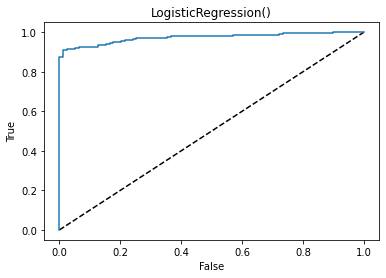

In [84]:
predict_model(log)

Details for GaussianNB() Model :-
The accuracy score for GaussianNB() is:- 92.3076923076923 

The confusion matrix for GaussianNB() is :- 
 [[ 79   0]
 [ 21 173]] 

The classification report for GaussianNB() is:- 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        79
           1       1.00      0.89      0.94       194

    accuracy                           0.92       273
   macro avg       0.90      0.95      0.91       273
weighted avg       0.94      0.92      0.93       273
 



Cross Validation Score for GaussianNB() is:- 
 [0.93956044 0.87912088 0.93406593 0.92265193 0.93370166]
Mean of Cross Validation Score for GaussianNB() is:- 
 0.9218201687814946
Standard Deviation of Cross Validation Score for GaussianNB() is:- 
 0.02204435037962673


GaussianNB() Model Score 92.3076923076923
Mean Score After CV
Model Score is 0.001256754295428486


Printing the AUC/RUC curve for the model


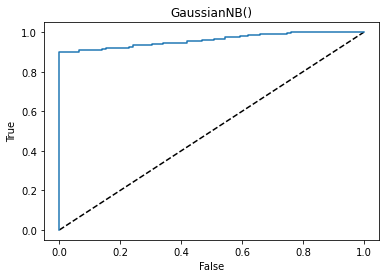

In [85]:
#INPUTS: log, nv, support, knear , dec_tree
predict_model(nv)

Details for KNeighborsClassifier() Model :-
The accuracy score for KNeighborsClassifier() is:- 95.23809523809523 

The confusion matrix for KNeighborsClassifier() is :- 
 [[ 77   2]
 [ 11 183]] 

The classification report for KNeighborsClassifier() is:- 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        79
           1       0.99      0.94      0.97       194

    accuracy                           0.95       273
   macro avg       0.93      0.96      0.94       273
weighted avg       0.96      0.95      0.95       273
 



Cross Validation Score for KNeighborsClassifier() is:- 
 [0.95054945 0.9010989  0.94505495 0.93922652 0.9558011 ]
Mean of Cross Validation Score for KNeighborsClassifier() is:- 
 0.9383461842025378
Standard Deviation of Cross Validation Score for KNeighborsClassifier() is:- 
 0.019425429361232965


KNeighborsClassifier() Model Score 95.23809523809523
Mean Score After CV
Model Score is 0.014034768178414536


Pr

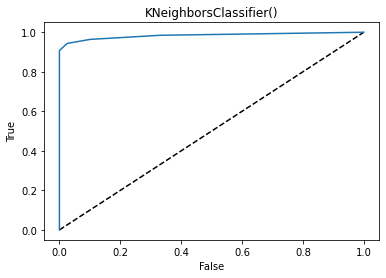

In [86]:
predict_model(knear)

Details for DecisionTreeClassifier() Model :-
The accuracy score for DecisionTreeClassifier() is:- 93.4065934065934 

The confusion matrix for DecisionTreeClassifier() is :- 
 [[ 70   9]
 [  9 185]] 

The classification report for DecisionTreeClassifier() is:- 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        79
           1       0.95      0.95      0.95       194

    accuracy                           0.93       273
   macro avg       0.92      0.92      0.92       273
weighted avg       0.93      0.93      0.93       273
 



Cross Validation Score for DecisionTreeClassifier() is:- 
 [0.80769231 0.91758242 0.95604396 0.94475138 0.92265193]
Mean of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.9097443992471618
Standard Deviation of Cross Validation Score for DecisionTreeClassifier() is:- 
 0.05293733297767678


DecisionTreeClassifier() Model Score 93.4065934065934
Mean Score After CV
Model Score is 0.0243215348

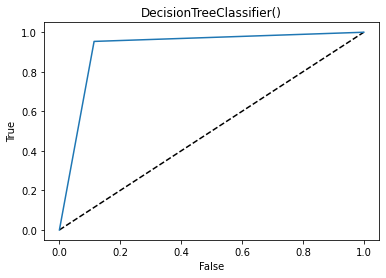

In [87]:
predict_model(dec_tree)

Details for SVC(probability=True) Model :-
The accuracy score for SVC(probability=True) is:- 93.77289377289377 

The confusion matrix for SVC(probability=True) is :- 
 [[ 77   2]
 [ 15 179]] 

The classification report for SVC(probability=True) is:- 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        79
           1       0.99      0.92      0.95       194

    accuracy                           0.94       273
   macro avg       0.91      0.95      0.93       273
weighted avg       0.94      0.94      0.94       273
 



Cross Validation Score for SVC(probability=True) is:- 
 [0.93406593 0.8956044  0.95054945 0.91712707 0.96132597]
Mean of Cross Validation Score for SVC(probability=True) is:- 
 0.9317345637787626
Standard Deviation of Cross Validation Score for SVC(probability=True) is:- 
 0.023468507668460443


SVC(probability=True) Model Score 93.77289377289377
Mean Score After CV
Model Score is 0.0059943739501751026


Printing 

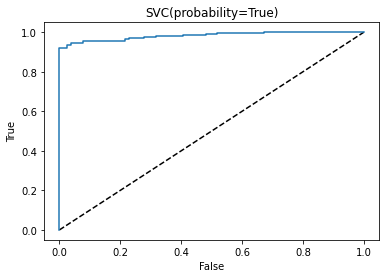

In [88]:
suport = SVC(probability= True)
predict_model(suport)

From the results we can see that Knear is having highest accuracy score 95%. Also, we can check that KNear is having highest f1 score that is: 92%. Hence we will perform hyper parameter tuning on Knear. 

In [89]:
from sklearn.model_selection import GridSearchCV

We will use Grid search CV for hyper parametr tuning. So, we called it from sklearn. 

class sklearn.neighbors.KNeighborsClassifier

(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [97]:
parameter = [{'n_neighbors':[10,11,12,13,14,15] , 'weights' : ['distance','uniform'], 'algorithm':['auto','ball_tree','kd_tree','brute']},
            {'n_neighbors':[10,11,12,13,14,15], 
             'weights':['distance','uniform'], 
             'algorithm':['auto','ball_tree','kd_tree','brute'],
            'leaf_size':[35,40,45,50],
             'p':[1,2],
             'n_jobs':[1,-1]}
            ]

grid_search = GridSearchCV ( estimator = knear,
                            param_grid = parameter,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)

grid_search = grid_search.fit(x_train,y_train)

In [98]:
accuracy = grid_search.best_score_
accuracy

0.9339037698412698

In [99]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 35,
 'n_jobs': 1,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'distance'}

We have performed hyperparameter tuning to enhance the model's performance. We get the result as 93%, Second it shows the best parameters that we can run with knear to get better result. 

In [100]:
import pickle
filename = 'pwer_plant_classification.pkl'
pickle.dump(knear, open(filename, 'wb'))

We can check that Knear is best mode for this dataset as it's giving a good f1 score among all the models. So, we are saving this model. 

In [109]:
power_reg = power2.copy()
power_reg.head(10)

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   
5     IND        India              AKRIMOTA LIG  IND0000003        250.0   
6     IND        India                    ALIYAR  IND0000004         60.0   
7     IND        India           ALLAIN DUHANGAN  IND0000005        192.0   
8     IND        India               ALMATTI DAM  IND0000006        290.0   
9     IND        India               AMAR KANTAK  IND0000007        210.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   
5   23.7689    68.6447         Coal         Oil         NaN  ...   
6   10.4547    77.0078        Hydro         NaN         NaN  ...   
7   32.2258    77.2070        Hydro         NaN         NaN  ...   
8   16.3300    75.8863        Hydro         NaN         NaN  ...   
9   23.1642    81.6373         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   
5                                   WRI      NaN                2018.0   
6                                   WRI      NaN                2018.0   
7                                   WRI      NaN                2018.0   
8                                   WRI      NaN                2018.0   
9                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264            843.7470   
4         1668.290000         3035.550000           5916.3700   
5          821.798000         1153.421000           1208.8520   
6          147.568450          157.558250            152.1952   
7          696.738800          674.391100            721.3352   
8          504.813250          480.594950            144.4342   
9         2642.322000         1887.904000           1643.0460   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   
5          1175.765000          1147.913000  Central Electricity Authority   
6            61.421350            89.629600  Central Electricity Authority   
7           675.724400           679.594950  Central Electricity Authority   
8           402.029750           439.372100  Central Electricity Authority   
9          1338.093000          1563.457000  Central Electricity Authority   

   estimated_ge

Copied the powerplant dataset into anothre variable power_reg

In [110]:
power_reg.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Columns having null value in the dataset. 
1. other_fuel2
2. other_fuel3
3. wepp_id 
4. estimated_generation_gwh, contains all null values no relevant information hence dropping the columns and name acolumn as well. 

In [111]:
power_reg = power_reg.drop("other_fuel2",axis = 1)
power_reg = power_reg.drop("other_fuel3",axis = 1)
power_reg = power_reg.drop("wepp_id",axis = 1)
power_reg = power_reg.drop("estimated_generation_gwh",axis = 1)
power_reg = power_reg.drop("name",axis = 1)

In [116]:
power_reg = power_reg.drop("year_of_capacity_data",axis = 1)

In [137]:
power_reg = power_reg.drop("country",axis = 1)
power_reg = power_reg.drop("country_long",axis = 1)


Columns dropped

In [138]:
power_reg.describe(include = 'all')

gppd_idnr  capacity_mw    latitude   longitude  primary_fuel  \
count  908.00000   908.000000  862.000000  862.000000    908.000000   
mean   453.50000   321.046378   21.196189   77.447848      3.205947   
std    262.26132   580.221767    6.248627    4.907260      2.281339   
min      0.00000     0.000000    8.168900   68.644700      0.000000   
25%    226.75000    16.837500   16.771575   74.258975      1.000000   
50%    453.50000    60.000000   21.778300   76.719250      3.000000   
75%    680.25000   388.125000   25.516375   79.441475      6.000000   
max    907.00000  4760.000000   34.649000   95.408000      7.000000   

       other_fuel1  commissioning_year       owner      source         url  \
count   908.000000          528.000000  908.000000  908.000000  908.000000   
mean      2.776432         1996.876894  227.534141   43.823789   94.429515   
std       0.429886           17.047817   83.895877   44.624092   70.352824   
min       0.000000         1927.000000    0.000000    0.000000    0.000000   
25%       3.000000         1988.000000  188.750000   22.000000   58.000000   
50%       3.000000         2000.000000  280.000000   22.000000   58.000000   
75%       3.000000         2011.250000  280.000000   29.250000  115.250000   
max       3.000000         2018.000000  280.000000  190.000000  303.000000   

       geolocation_source  generation_gwh_2013  generation_gwh_2014  \
count          908.000000           384.000000           401.000000   
mean             1.754405          2304.059202          2420.393316   
std              0.699844          3794.767492          4013.558173   
min              0.000000             0.000000             0.000000   
25%              2.000000           244.458088           223.650436   
50%              2.000000           797.063475           805.760000   
75%              2.000000          2795.021500          3034.575000   
max              3.000000         27586.200000         28127.000000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count           425.000000           437.000000           443.000000   
mean           2414.072373          2453.936292          2531.754458   
std            4183.203199          4152.038216          4187.236364   
min               0.000000             0.000000             0.000000   
25%             174.174750           187.193669           177.643170   
50%             701.027250           716.728350           807.601700   
75%            3080.000000          3263.483000          3258.785000   
max           30539.000000         30015.000000         35116.000000   

       generation_data_source  
count              908.000000  
mean                 0.504405  
std                  0.500256  
min                  0.000000  
25%                  0.000000  
50%                  1.000000  
75%                  1.000000  
max                  1.000000

The above is the description of all the columns. Showing the mean meadian min value and max values and several others mathemaical expression. ALso, we can see some columns with NaN values as well. 

In [139]:
power_reg.dtypes

gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int32
dtype: object

We can check that we have several columns with object datatype. We will now encode the data to numerical form. 

In [140]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

As our dataset is having object datatype we have imported label encoder from sklearn and we will convert the object to int or float dataype using encoder. 

In [141]:
col2 = power_reg.columns
for i in col2:
    if power_reg[i].dtypes == 'object':
        power_reg[i] = label.fit_transform(power_reg[i])

We have converted all the columns with object dtype to numerical 

In [142]:
power_reg.dtypes

gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int32
dtype: object

All the dtypes converted to int. 

In [145]:
col1 = power_reg.columns
col1

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [146]:
for i in col1:
    if power_reg[i].dtypes == "float64":
        print("Columns",i," have datatype FLOAT64")
        if power_reg[i].skew() > 0.55 or power_reg[i].skew() < -0.55:
            print("Column",i,"is skewed. The column have skewness =",power_reg[i].skew())
            print("Replacing null values using median")
            power_reg[i] = power_reg[i].fillna(power_reg[i].median())
            print("\n")
        else:
            print("Removing Null values using mean from non skewed column")
            power_reg[i] = power_reg[i].fillna(power_reg[i].mean())
            print("\n")

Columns capacity_mw  have datatype FLOAT64
Column capacity_mw is skewed. The column have skewness = 3.1932573023446458
Replacing null values using median


Columns latitude  have datatype FLOAT64
Removing Null values using mean from non skewed column


Columns longitude  have datatype FLOAT64
Column longitude is skewed. The column have skewness = 1.1009421966310267
Replacing null values using median


Columns commissioning_year  have datatype FLOAT64
Column commissioning_year is skewed. The column have skewness = -1.0561318555309964
Replacing null values using median


Columns generation_gwh_2013  have datatype FLOAT64
Column generation_gwh_2013 is skewed. The column have skewness = 3.4163376068921907
Replacing null values using median


Columns generation_gwh_2014  have datatype FLOAT64
Column generation_gwh_2014 is skewed. The column have skewness = 3.3576826439934453
Replacing null values using median


Columns generation_gwh_2015  have datatype FLOAT64
Column generation_gwh_2015 is

We removed the null values using mean and median from the columns. 

In [147]:
power_reg.isnull().sum()

gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

As we can check there are no null values in the dataset

gppd_idnr                     AxesSubplot(0.125,0.71587;0.0945122x0.16413)
capacity_mw                AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
latitude                   AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
longitude                  AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
primary_fuel               AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
other_fuel1                AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
commissioning_year         AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
owner                        AxesSubplot(0.125,0.518913;0.0945122x0.16413)
source                    AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
url                       AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
geolocation_source        AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
generation_gwh_2013       AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
generation_gwh_2014       AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
generation_gwh_2015      

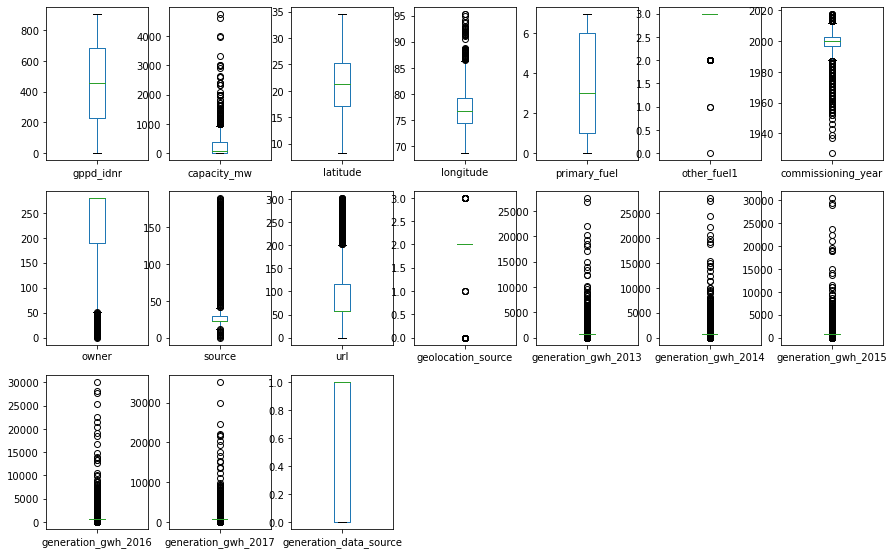

In [149]:
power_reg.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

We can see there are outliers presrnt in the dataset. 

0.0
gppd_idnr
No skewness is present


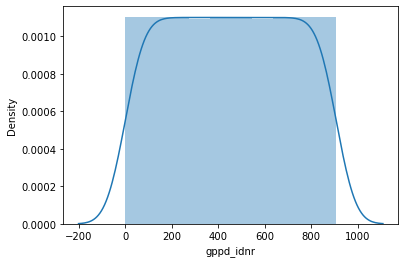

3.1932573023446458
capacity_mw
Column is having skewness


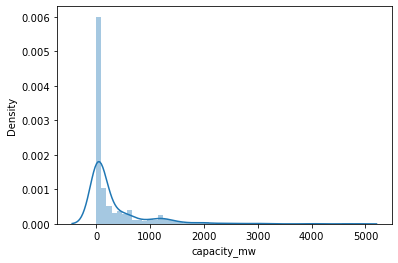

-0.14739148022373944
latitude
No skewness is present


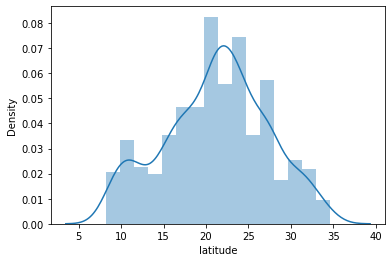

1.150963154131737
longitude
Column is having skewness


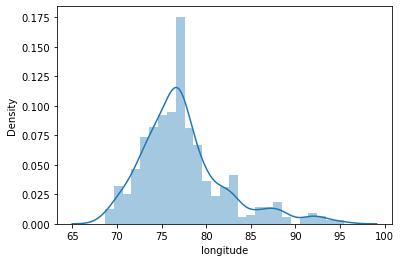

0.47114086346676237
primary_fuel
No skewness is present


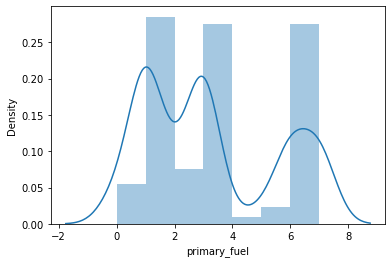

-1.6194409307276927
other_fuel1
Column is having skewness


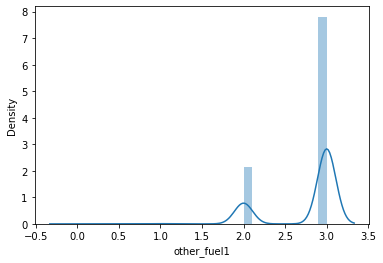

-1.6502303797102624
commissioning_year
Column is having skewness


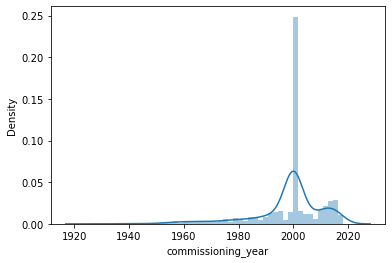

-1.3756067862273889
owner
Column is having skewness


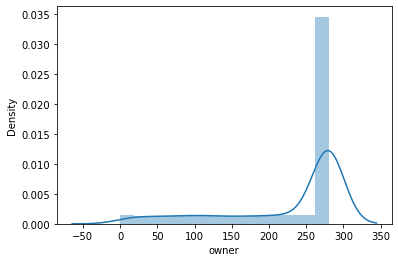

1.829144720333752
source
Column is having skewness


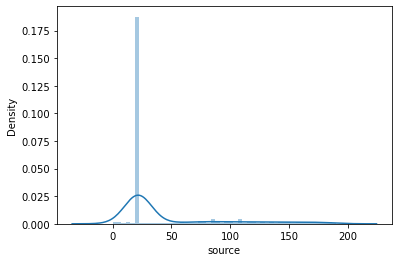

1.5122584535861499
url
Column is having skewness


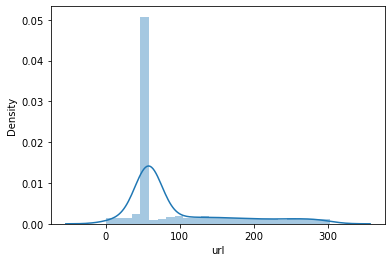

-1.9220799609171169
geolocation_source
Column is having skewness


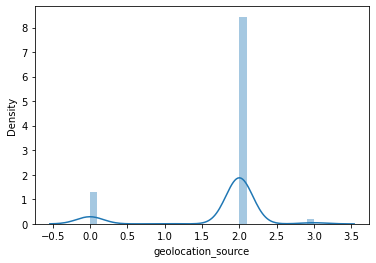

5.535740137046131
generation_gwh_2013
Column is having skewness


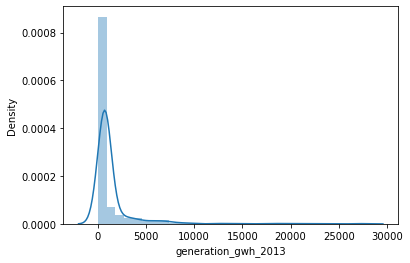

5.325540372189969
generation_gwh_2014
Column is having skewness


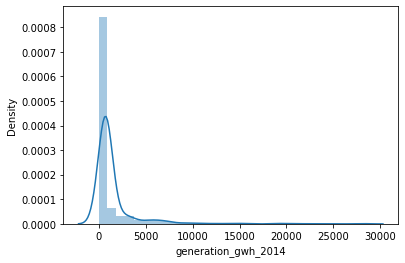

5.565769585345019
generation_gwh_2015
Column is having skewness


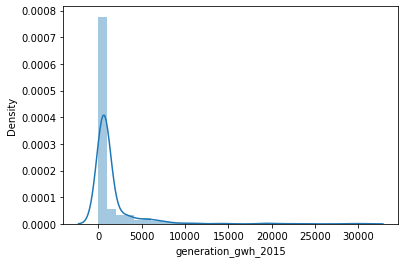

5.278232615549732
generation_gwh_2016
Column is having skewness


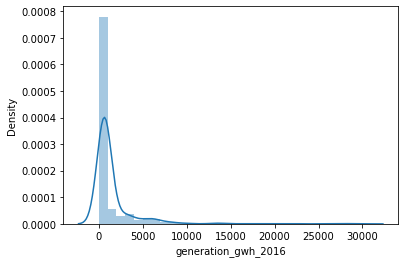

5.312974594183324
generation_gwh_2017
Column is having skewness


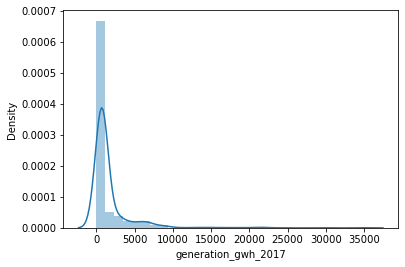

-0.017651001880534225
generation_data_source
No skewness is present


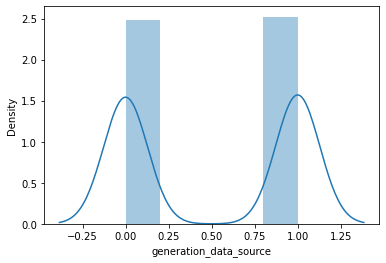

In [151]:
for i in col2:
    if (power_reg[i].skew() > 0.55 or power_reg[i].skew() < -0.55): 
        print(power_reg[i].skew())
        print(i)
        print("Column is having skewness")
    else:
        print(power_reg[i].skew())
        print(i)
        print("No skewness is present")
    
    plt.figure()
    sns.distplot(power_reg[i])
    plt.show()

We plotted dist plot o check skewness and also printed which column is having skewness present 

<function matplotlib.pyplot.show(close=None, block=None)>

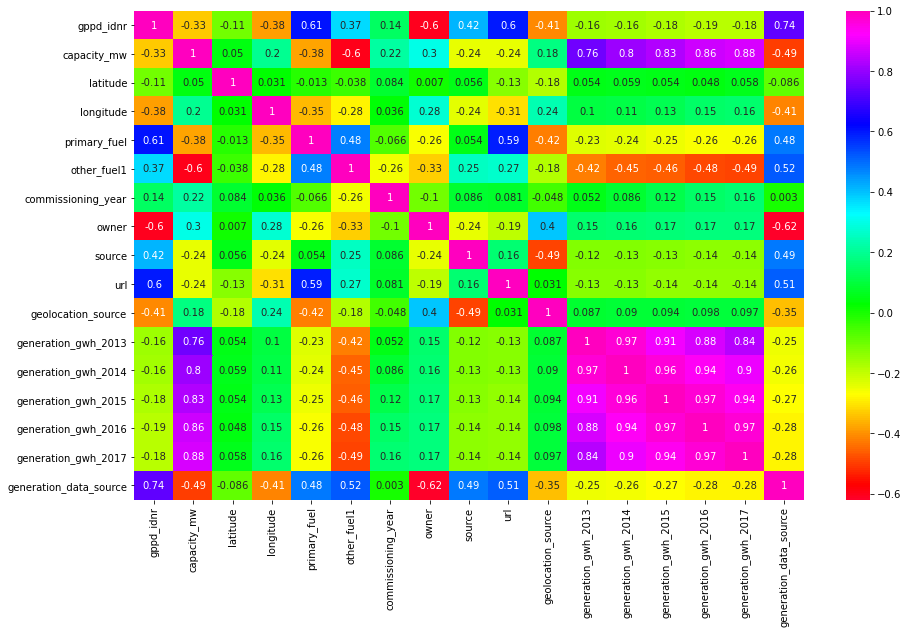

In [148]:
plt.figure(figsize=(15,9))
sns.heatmap(power_reg.corr(),annot=True, cmap = 'gist_rainbow')
plt.show

We can see that our target variable:capacity_mw is highly corelated with few columns and these columns are correlated with each other. So we will use PCA to remove the collinearity 

In [155]:
x = power_reg.drop("capacity_mw",axis = 1)
x.head()

gppd_idnr  latitude  longitude  primary_fuel  other_fuel1  \
0        658   28.1839    73.2407             6            3   
1        520   24.7663    74.6090             1            3   
2        854   21.9038    69.3732             7            3   
3          0   23.8712    91.3602             2            3   
4          1   21.9603    82.4091             1            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1              2000.0    258     174  173                   2   
2              2000.0      2      21  205                   2   
3              2004.0    280      22   58                   2   
4              2015.0    280      22   58                   2   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475           805.760000            701.02725   
1           797.063475           805.760000            701.02725   
2           797.063475           805.760000            701.02725   
3           631.777928           617.789264            843.74700   
4          1668.290000          3035.550000           5916.37000   

   generation_gwh_2016  generation_gwh_2017  generation_data_source  
0           716.728350           807.601700                       1  
1           716.728350           807.601700                       1  
2           716.728350           807.601700                       1  
3           886.004428           663.774500                       0  
4          6243.000000          5385.579736                       0

In [154]:
y = power_reg["capacity_mw"]
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

We splotted the dataset into X and y for training and testing purpose. 

In [157]:
from scipy.stats import zscore
x_zscore = np.abs(zscore(x))
x_new = x[(x_zscore < 3).all(axis=1)]
print("new.shape",x_new.shape)

new.shape (834, 16)


We have called zscore method to remove outliers and calculated zscore. After that we removed all the values with zscore > 3. Printed the shape of new data and can check few rows are removed from the dataset.  

In [163]:
x.shape

(908, 16)

Shape of origional data

In [161]:
data_loss = (908-834)/908*100

In [162]:
data_loss

8.149779735682818

We can see that dataloss is 8% which can be taken into account. Hence proceeding further. 

In [164]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

We checked that we had skewness present in the dataset, which we removed using the yeo johnson method. 

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

The data was not equally distributed in the dataset, hence we use standard scaler which makes the scale equally among the dataset. 

In [166]:
from sklearn.model_selection import train_test_split

We called train test split from sklearn model selection that will help us splitting the data for training and testing

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

As our label is cintinues nemrical which makes this a regression problem. Hence calling all the alogrithms we are using to build a model. 

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 45)

Here we split our data in training and testing. We aplit it in 70-30 ratio where 70% data is set for trainiung the model and 30% for testing the model. 

In [176]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svc = SVR()
rnd = RandomForestRegressor()

We cstored all the algorithms to a variable which will be used further to calculate the scores of the model. 

In [179]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

We called mean_squared_error,mean_absolute_error for checking the errors if ny in our predictions and model building. r2 Score to check the performance of the model.

In [184]:
def predict_score(X):
    X.fit(x_train,y_train)
    prediction = X.predict(x_test)
    
    print('Error Calculations: -')
    print('Means absolute error', mean_absolute_error(y_test,prediction))
    print('Means Squared Error',mean_squared_error(y_test,prediction))
    print('Root mean square', np.sqrt(mean_squared_error(y_test,prediction)))
    print('Model Score',r2_score(y_test,prediction))
    
    from sklearn.model_selection import cross_val_score
    cv_score = cross_val_score(X,x,y,cv=5)
    print('\n')
    print("Cross Validation Score for",X,"is:- \n",cv_score)
    print("Mean of Cross Validation Score for",X,"is:- \n",cv_score.mean())
    print("Standard Deviation of Cross Validation Score for",X,"is:- \n",cv_score.std())
    print('\n')

In [187]:
predict_score(lr)

Error Calculations: -
Means absolute error 183.61352361577357
Means Squared Error 89447.58280522212
Root mean square 299.07788752300314
Model Score 0.5162143470722798


Cross Validation Score for LinearRegression() is:- 
 [0.65428042 0.63589634 0.6318475  0.76662282 0.68891022]
Mean of Cross Validation Score for LinearRegression() is:- 
 0.6755114601192509
Standard Deviation of Cross Validation Score for LinearRegression() is:- 
 0.04981458071666343




In [188]:
predict_score(rnd)

Error Calculations: -
Means absolute error 92.1215709157509
Means Squared Error 36717.21993791931
Root mean square 191.61737900806207
Model Score 0.8014114673167003


Cross Validation Score for RandomForestRegressor() is:- 
 [0.8126107  0.8210819  0.80204526 0.86050813 0.89174965]
Mean of Cross Validation Score for RandomForestRegressor() is:- 
 0.8375991258118936
Standard Deviation of Cross Validation Score for RandomForestRegressor() is:- 
 0.0335213959318715




In [189]:
from sklearn.model_selection import GridSearchCV
parameters = [{ 'n_estimators' :[200,250,300,350,400,450,500],
               'criterion':['squared_error','absolute_error','poisson'],
               'max_depth':[10,20,30,40,50]}]

grid_cv = GridSearchCV(estimator=rnd, param_grid = parameters)
grid_cv.fit(x_test, y_test)
best_para = grid_cv.best_params_
print(best_para)
best_result = grid_cv.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'poisson', 'max_depth': 40, 'n_estimators': 300}
0.7252439504335675
0.73


In [190]:
import pickle
filename = 'power_plant_reg.pkl'
pickle.dump(rnd, open(filename, 'wb'))

We can see that random forest regressor is givjng best results for the dataset hence saving the RND model. 